.

### 🌾 Dataset Overview

This dataset provides insights into various aspects of agriculture 🌱, specifically focusing on farm-level details, crop types, irrigation methods, soil properties, and associated metrics such as yield, water usage, fertilizer usage, and pesticide usage. The goal is to analyze and predict crop yields and identify factors that influence productivity.

### import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

### load and Explore Dataset

In [2]:
os.chdir("D:\Courses 💡😍\Courses 💡😍\Artificial Intelligence ツツ♥\myProjects\Agriculture and Farming Dataset")

print("Current Working Directory:", os.getcwd())

df = pd.read_csv('Agriculture Dataset.csv')

Current Working Directory: D:\Courses 💡😍\Courses 💡😍\Artificial Intelligence ツツ♥\myProjects\Agriculture and Farming Dataset


#### Display basic information about the dataset

In [3]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (50, 10)


In [4]:
#display first 5 row
display(df.head())

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69


##### Column Information:

* `Farm_ID`: Unique identifier for each farm (object)
* `Crop_Type`: Type of crop being cultivated (object)
* `Farm_Area(acres)`: Land area of the farm in acres (float64)
* `Irrigation_Type`: Type of irrigation used (object)
* `Fertilizer_Used(tons)`: Amount of fertilizer used in tons (float64)
* `Pesticide_Used(kg)`: Amount of pesticide used in kg (float64)
* `Yield(tons)`: Crop yield in tons (float64)
* `Soil_Type`: Type of soil on the farm (object)
* `Season`: Season in which the crop is cultivated (object)
* `Water_Usage(cubic meters)`: Water used in cubic meters (float64)ts (float64)

In [5]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Farm_ID                    50 non-null     object 
 1   Crop_Type                  50 non-null     object 
 2   Farm_Area(acres)           50 non-null     float64
 3   Irrigation_Type            50 non-null     object 
 4   Fertilizer_Used(tons)      50 non-null     float64
 5   Pesticide_Used(kg)         50 non-null     float64
 6   Yield(tons)                50 non-null     float64
 7   Soil_Type                  50 non-null     object 
 8   Season                     50 non-null     object 
 9   Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), object(5)
memory usage: 4.0+ KB


In [6]:
#statistical summary about dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Farm_Area(acres),50.0,254.9638,139.417782,12.50,135.7100,281.980,368.1075,483.88
Fertilizer_Used(tons),50.0,4.9054,2.732689,0.50,2.4375,5.045,6.8850,9.96
Pesticide_Used(kg),50.0,2.3980,1.438613,0.14,0.9725,2.330,3.4175,4.99
Yield(tons),50.0,27.0592,13.345789,3.86,16.1900,28.970,37.8600,48.02
Water_Usage(cubic meters),50.0,56724.2956,27264.992053,5869.75,37818.1525,54097.075,82240.0325,94754.73


#### Statistical Summary:

* The average farm area is around 255 acres, with a standard deviation of 139.
* Fertilizer and pesticide usage vary, with average values of 4.9 tons and 2.4 kg, respectively.
* The average crop yield is about 27 tons, with water usage averaging 56,724 cubic meters.



In [7]:
# Check for missing and duplicated values
print(f'\nmissing values: {df.isna().sum().sum()}')
print(f'\nDuplicated values: {df.duplicated().sum()}')


missing values: 0

Duplicated values: 0


#### Unique Value Exploration

In [8]:
# Display the number of unique values in each column
print("\nUnique Value in each column:")
df.nunique()


Unique Value in each column:


Farm_ID                      50
Crop_Type                    10
Farm_Area(acres)             50
Irrigation_Type               5
Fertilizer_Used(tons)        49
Pesticide_Used(kg)           46
Yield(tons)                  50
Soil_Type                     5
Season                        3
Water_Usage(cubic meters)    50
dtype: int64

In [9]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include = ['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print('\nNumerical Columns', numerical_columns)
print('\nCategorical Columns', non_numerical_columns)


Numerical Columns ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

Categorical Columns ['Farm_ID', 'Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']


In [10]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumns{col}")
    print(f"Unique Values: {df[col].unique()}")


ColumnsFarm_ID
Unique Values: ['F001' 'F002' 'F003' 'F004' 'F005' 'F006' 'F007' 'F008' 'F009' 'F010'
 'F011' 'F012' 'F013' 'F014' 'F015' 'F016' 'F017' 'F018' 'F019' 'F020'
 'F021' 'F022' 'F023' 'F024' 'F025' 'F026' 'F027' 'F028' 'F029' 'F030'
 'F031' 'F032' 'F033' 'F034' 'F035' 'F036' 'F037' 'F038' 'F039' 'F040'
 'F041' 'F042' 'F043' 'F044' 'F045' 'F046' 'F047' 'F048' 'F049' 'F050']

ColumnsCrop_Type
Unique Values: ['Cotton' 'Carrot' 'Sugarcane' 'Tomato' 'Soybean' 'Rice' 'Maize' 'Wheat'
 'Barley' 'Potato']

ColumnsIrrigation_Type
Unique Values: ['Sprinkler' 'Manual' 'Flood' 'Rain-fed' 'Drip']

ColumnsSoil_Type
Unique Values: ['Loamy' 'Peaty' 'Silty' 'Clay' 'Sandy']

ColumnsSeason
Unique Values: ['Kharif' 'Zaid' 'Rabi']


#### Unique Values in Each Column
`Farm_ID`: 50 unique IDs

`Crop_Type`: 10 unique crop types

`Irrigation_Type`: 5 unique types

`Soil_Type`: 5 unique types

`Season`: 3 unique valuessepyalues

### Exploratory Data Analysis (EDA)

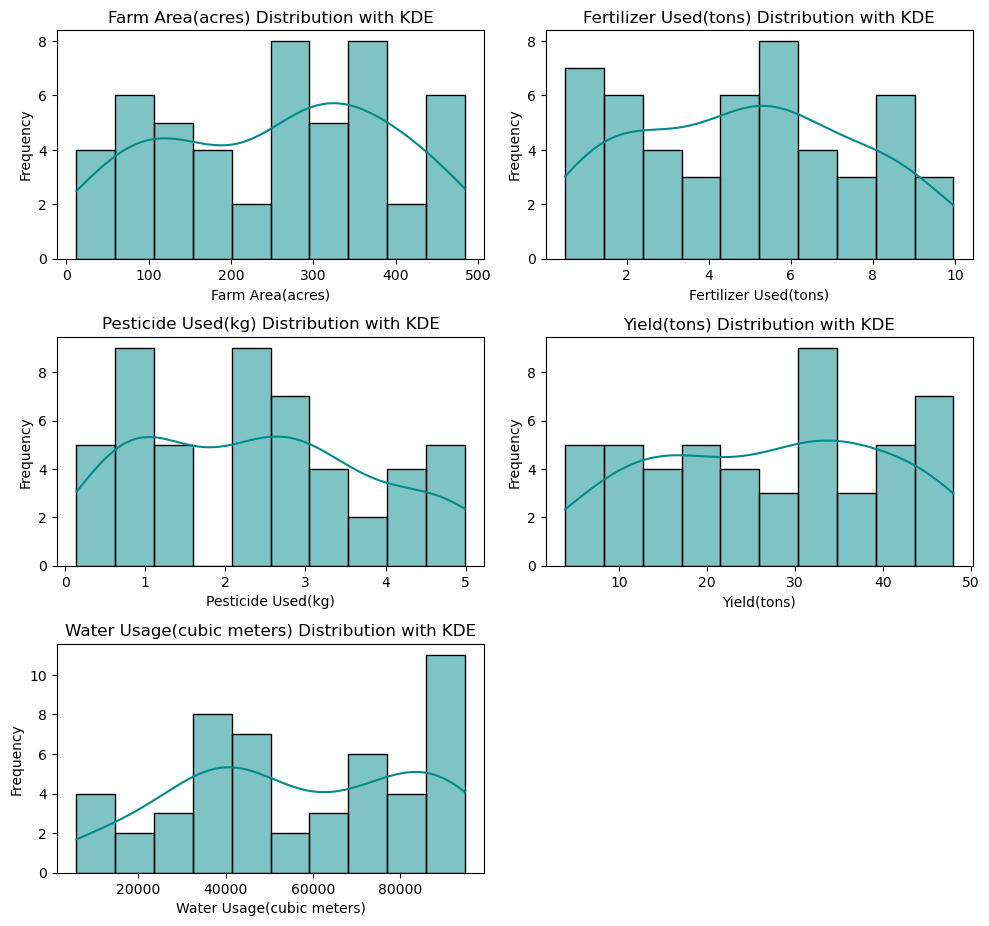

In [11]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)  
        sns.histplot(data[column], kde=True, bins=10, color='darkcyan')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

univariate_analysis(df, columns_to_analyze)

#### Univariate analysis of the numerical columns

`1.Farm Area (acres):`
* The distribution is relatively wide, with farm areas ranging from small to large plots. The histogram shows a slightly      right-skewed pattern, suggesting that while many farms have moderate areas, there are a few larger farms as well.:  

`2.Fertilizer Used (tons):`
*  
The distribution of fertilizer usage shows a peak around the middle values with a few farms using significantly higher amounts. This may indicate a common range of fertilizer requirements across farms, with only a few outliers.


`3.Pesticide Used (kg):`
*  
Pesticide usage appears to be left-skewed, with many farms using relatively low quantities, while a few farms use substantially higher amounts.

`4.Yield (tons):`
*  
Yield distribution is slightly right-skewed, with a majority of farms achieving moderate yields and some achieving much higher yields. This spread might reflect differences in crop type, farm size, and input efficiency.y.


`5.Water Usage (cubic meters):`
*  
Water usage has a wide range and a right-skewed distribution. Some farms consume significantly more water, possibly due to crop requirements, irrigation methods, or farm size.methods, or farm size.

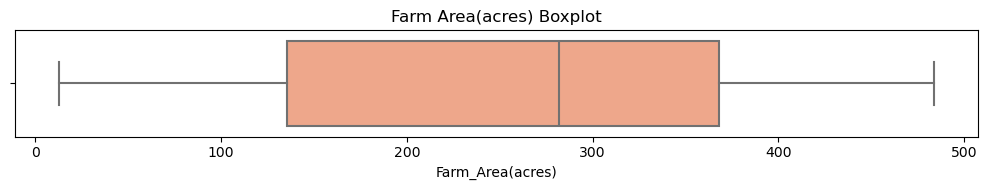


Summary Statistics for Farm Area(acres):
 count     50.000000
mean     254.963800
std      139.417782
min       12.500000
25%      135.710000
50%      281.980000
75%      368.107500
max      483.880000
Name: Farm_Area(acres), dtype: float64


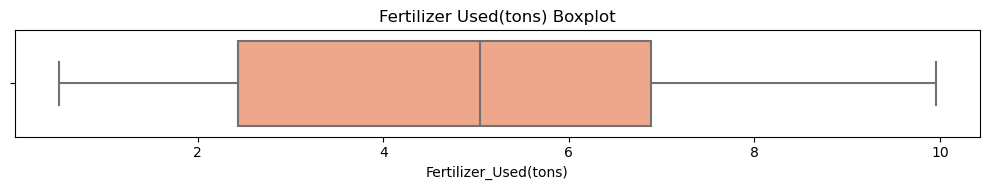


Summary Statistics for Fertilizer Used(tons):
 count    50.000000
mean      4.905400
std       2.732689
min       0.500000
25%       2.437500
50%       5.045000
75%       6.885000
max       9.960000
Name: Fertilizer_Used(tons), dtype: float64


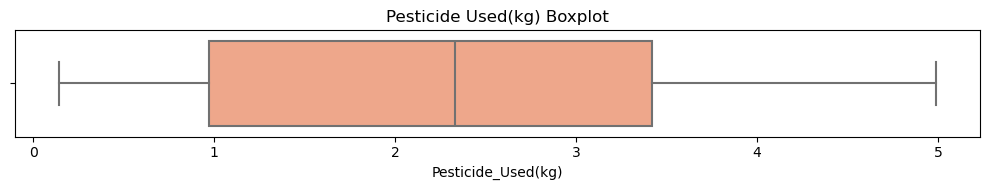


Summary Statistics for Pesticide Used(kg):
 count    50.000000
mean      2.398000
std       1.438613
min       0.140000
25%       0.972500
50%       2.330000
75%       3.417500
max       4.990000
Name: Pesticide_Used(kg), dtype: float64


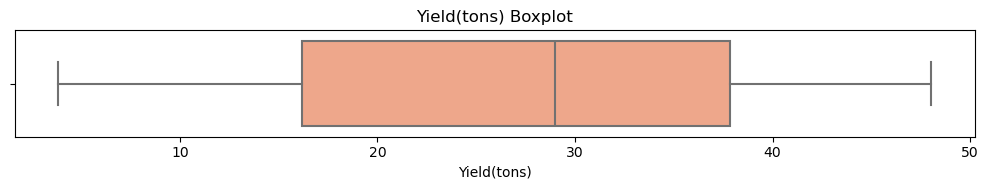


Summary Statistics for Yield(tons):
 count    50.000000
mean     27.059200
std      13.345789
min       3.860000
25%      16.190000
50%      28.970000
75%      37.860000
max      48.020000
Name: Yield(tons), dtype: float64


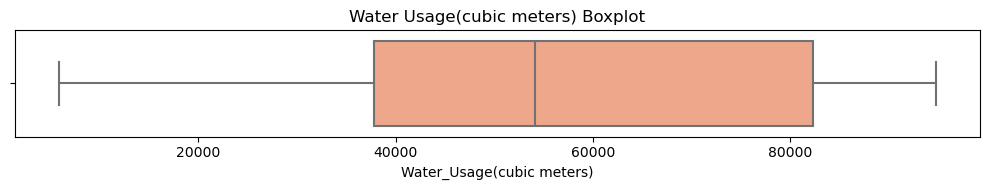


Summary Statistics for Water Usage(cubic meters):
 count       50.000000
mean     56724.295600
std      27264.992053
min       5869.750000
25%      37818.152500
50%      54097.075000
75%      82240.032500
max      94754.730000
Name: Water_Usage(cubic meters), dtype: float64


In [12]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    sns.boxplot(x=data[column], color='lightsalmon')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

#### Insights based on the boxplots and summary statistics:

`Farm Area (acres):`

**Range:** The farm area varies significantly, from as low as 12.5 acres to as high as 483.88 acres.

**Distribution:** The median farm area is around 282 acres, with a relatively wide interquartile range (IQR), suggesting variability in farm sizes.

**Potential Outliers:** Larger farms may act as outliers in this distribution, as indicated by the spread on the higher end.


`Fertilizer Used (tons):`

**Range:** Fertilizer usage ranges from 0.5 to 9.96 tons, with an average of about 4.9 tons.

**Distribution:** The IQR shows that most farms use between approximately 2.4 and 6.9 tons. There are likely a few farms using higher quantities as outliers.


`Pesticide Used (kg):`

**Range:** Pesticide usage ranges from 0.14 to 4.99 kg, with a mean around 2.4 kg.
Distribution: The median value is around 2.33 kg, with some farms using significantly more, likely representing outliers.


`Yield (tons):`

**Range:** Crop yield ranges from 3.86 to 48.02 tons, with an average yield of 27.06 tons.

**Distribution:** The central IQR indicates yields primarily between 16.19 and 37.86 tons, suggesting variability depending on factors like crop type and farm size.


`Water Usage (cubic meters):`

**Range:** Water usage shows a wide range, from 5,869.75 to 94,754.73 cubic meters.

**Distribution:** The median is around 54,097 cubic meters, with a large IQR. Some farms use exceptionally high quantities of water, which could reflect outliers due to factors like farm size or crop water needs

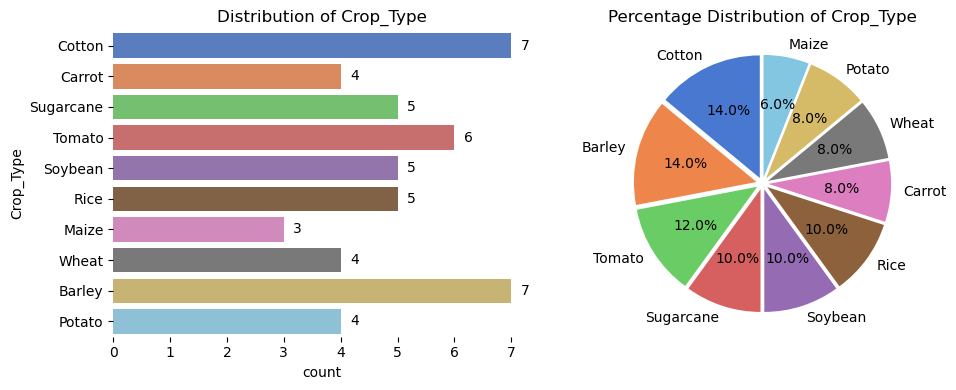

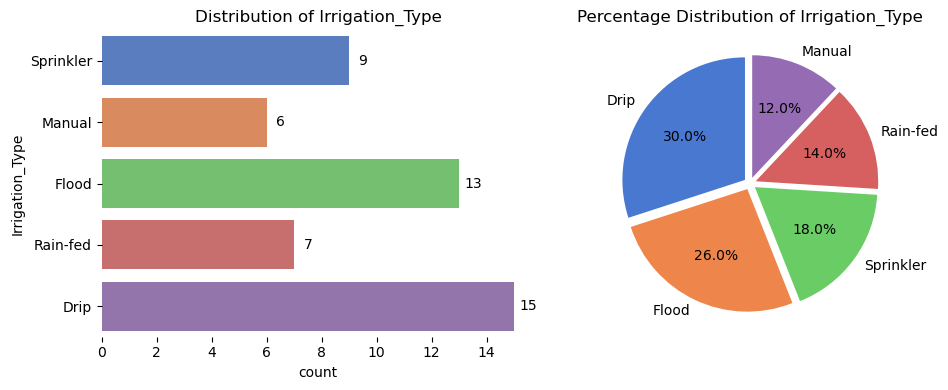

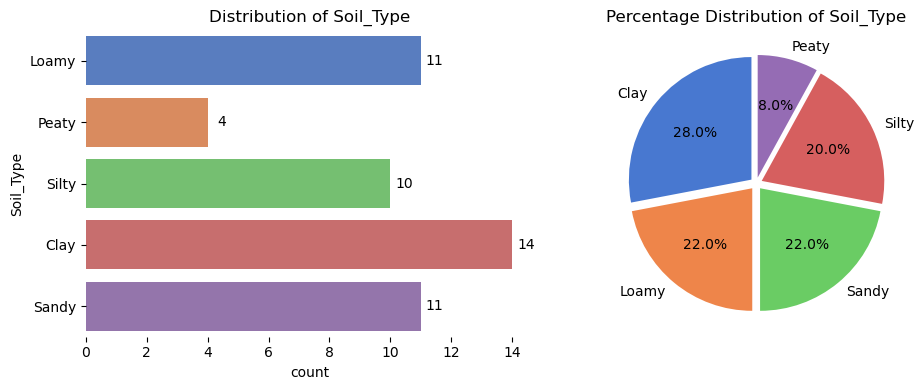

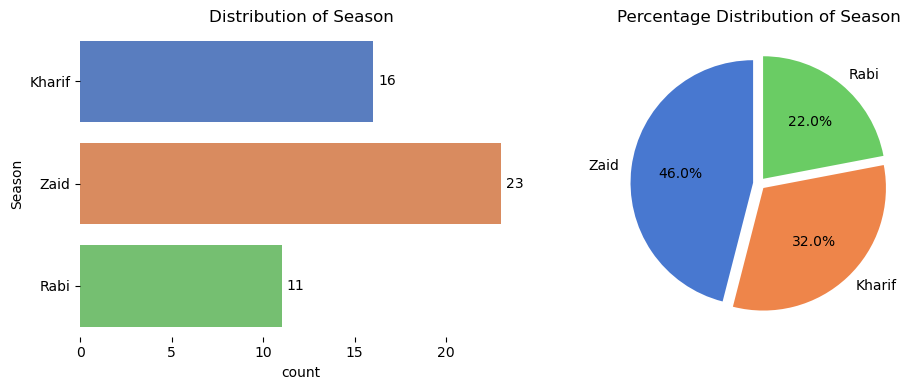

In [13]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='muted')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


plot_categorical_distribution('Crop_Type')
plot_categorical_distribution('Irrigation_Type')
plot_categorical_distribution('Soil_Type')
plot_categorical_distribution('Season')

**Crop Type:**

`Distribution:` The dataset includes a variety of crops, with certain crops like Cotton, Carrot, and Tomato appearing more frequently. Other crops such as Potato and Barley are less common.


`Percentage:` The distribution of crop types is fairly diverse, indicating a range of crops cultivated across different farms. This variety could impact resource needs and yields.



**Irrigation Type:**

`Distribution:` Irrigation methods vary, with Sprinkler and Manual methods being more prevalent. Drip and Rain-fed methods are less common.


`Percentage:` The distribution suggests that traditional methods like Manual and Sprinkler irrigation are dominant, potentially influencing water and fertilizer usage.



**Soil Type:**

`Distribution:` There is a relatively balanced representation of soil types, with Loamy and Silty soils being the most common, followed by Peaty, Clay, and Sandy.


y
`Percentage:` This balance across soil types indicates a range of soil conditions that might affect crop selection and yield potential.





**Season:**

`
Distributio`n: The Kharif season appears to be the most common, followed by Zaid and Rabi season



s
`Percentage:` This suggests that a significant portion of farming activities takes place during the Kharif season, potentially due to seasonal crop cycles and climate conditions.ns.itions.ge.ds.

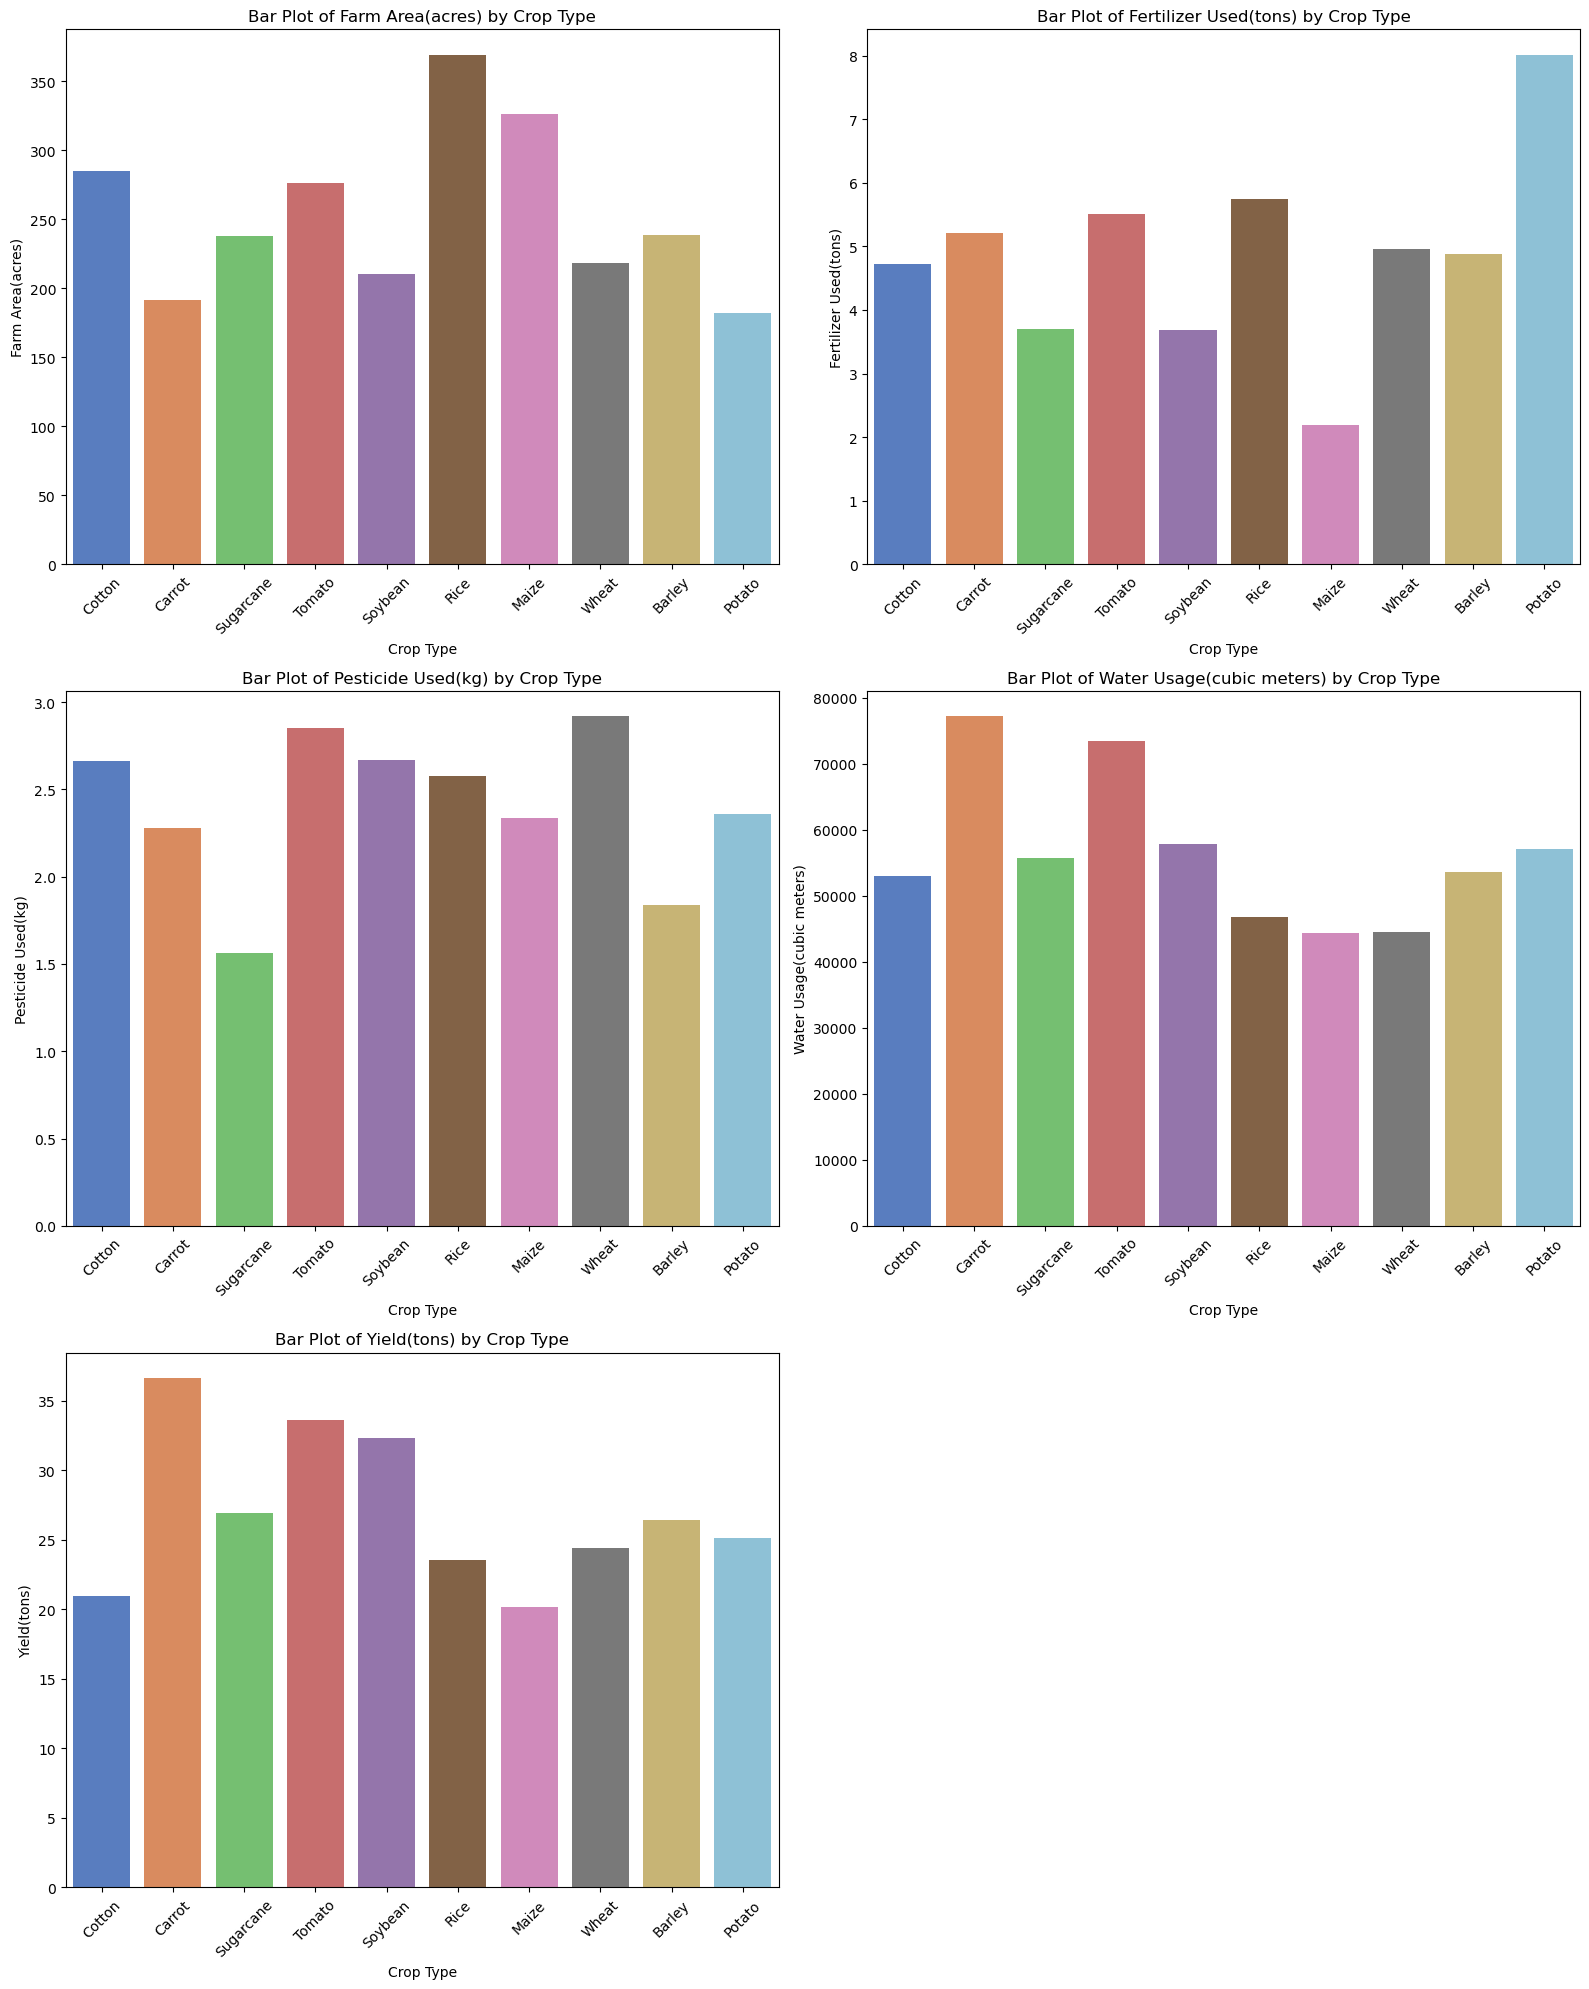

In [14]:
# Creating bar plots for each column by 'Crop_Type'
columns_to_plot = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)',
                   'Water_Usage(cubic meters)', 'Yield(tons)']

plt.figure(figsize=(16, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=df, x='Crop_Type', y=column, ci=None, palette='muted')
    plt.title(f'Bar Plot of {column.replace("_", " ")} by Crop Type')
    plt.xlabel('Crop Type')
    plt.ylabel(column.replace('_', ' '))
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [15]:
# Identifying crop types with highest and lowest values for different metrics
# Creating a more readable output format
metrics_summary = {
    "Metric": [
        "Highest Yield", "Lowest Yield",
        "Highest Fertilizer Used", "Lowest Fertilizer Used",
        "Highest Pesticide Used", "Lowest Pesticide Used",
        "Highest Water Usage", "Lowest Water Usage",
        "Highest Farm Area", "Lowest Farm Area"
    ],
    
    "Crop Type": [
        df.loc[df['Yield(tons)'].idxmax()]['Crop_Type'], df.loc[df['Yield(tons)'].idxmin()]['Crop_Type'],
        df.loc[df['Fertilizer_Used(tons)'].idxmax()]['Crop_Type'], df.loc[df['Fertilizer_Used(tons)'].idxmin()]['Crop_Type'],
        df.loc[df['Pesticide_Used(kg)'].idxmax()]['Crop_Type'], df.loc[df['Pesticide_Used(kg)'].idxmin()]['Crop_Type'],
        df.loc[df['Water_Usage(cubic meters)'].idxmax()]['Crop_Type'], df.loc[df['Water_Usage(cubic meters)'].idxmin()]['Crop_Type'],
        df.loc[df['Farm_Area(acres)'].idxmax()]['Crop_Type'], df.loc[df['Farm_Area(acres)'].idxmin()]['Crop_Type']
    ],
    
    "Value": [
        df.loc[df['Yield(tons)'].idxmax()]['Yield(tons)'], df.loc[df['Yield(tons)'].idxmin()]['Yield(tons)'],
        df.loc[df['Fertilizer_Used(tons)'].idxmax()]['Fertilizer_Used(tons)'], df.loc[df['Fertilizer_Used(tons)'].idxmin()]['Fertilizer_Used(tons)'],
        df.loc[df['Pesticide_Used(kg)'].idxmax()]['Pesticide_Used(kg)'], df.loc[df['Pesticide_Used(kg)'].idxmin()]['Pesticide_Used(kg)'],
        df.loc[df['Water_Usage(cubic meters)'].idxmax()]['Water_Usage(cubic meters)'], df.loc[df['Water_Usage(cubic meters)'].idxmin()]['Water_Usage(cubic meters)'],
        df.loc[df['Farm_Area(acres)'].idxmax()]['Farm_Area(acres)'], df.loc[df['Farm_Area(acres)'].idxmin()]['Farm_Area(acres)']
    ]
}

metrics_summary_df = pd.DataFrame(metrics_summary)
metrics_summary_df

,Metric,Crop Type,Value
0,Highest Yield,Tomato,48.02
1,Lowest Yield,Maize,3.86
2,Highest Fertilizer Used,Cotton,9.96
3,Lowest Fertilizer Used,Cotton,0.50
4,Highest Pesticide Used,Rice,4.99
5,Lowest Pesticide Used,Barley,0.14
6,Highest Water Usage,Cotton,94754.73
7,Lowest Water Usage,Rice,5869.75
8,Highest Farm Area,Rice,483.88
9,Lowest Farm Area,Sugarcane,12.50


### Insights based on the summary of crop metrics:

**Yield Insights:**
* `Highest Yield:` Tomato has the highest yield at `48.02 tons`, indicating its potential as a highly productive crop under favorable conditions.

* `Lowest Yield:` Maize has the lowest yield at `3.86 tons`, which could suggest challenges in cultivation, lower productivity, or constraints due to environmental or management factors.


**Fertilizer Usage:**
* `Highest Fertilizer Usage:` Cotton stands out with the highest fertilizer usage at `9.96 tons`, suggesting a high nutrient demand for maximizing productivity.

* `Lowest Fertilizer Usage:` Interestingly, Cotton also has the lowest fertilizer usage at `0.50 tons` for certain instances, which could reflect variability in management practices or differing needs across different fields.yd
t.n.
s.srs.on or limited demand.

**Pesticide Usage:**

* `Highest Pesticide Usage:` Rice uses the highest amount of pesticides at `4.99 kg`, which may indicate higher susceptibility to pests and the need for more intensive pest management.

* `Lowest Pesticide Usage:` Barley, on the other hand, has the lowest pesticide usage at `0.14 kg`, suggesting it may be less prone to pest attacks or is managed with minimal chemical intervention.

**Water Usage:**

* `Highest Water Usage:` Cotton has the highest water usage, consuming `94,754.73` cubic meters. This highlights the water-intensive nature of Cotton cultivation, which may have implications for irrigation and sustainability.


* `Lowest Water Usage:` Rice, despite being a typically water-demanding crop, shows the lowest water usage at `5,869.75` cubic meters, potentially due to different cultivation methods, such as more water-efficient practices.

**Farm Area:**
* `Highest Farm Area:` Rice is cultivated on the largest farm area, with `483.88 acres`, indicating its importance or high demand in the region.


* `Lowest Farm Area:` Sugarcane has the smallest farm area at `12.50 acres`, which could reflect niche cultivation or limited demand.

nd.

The insights illustrate significant variability in resource usage, productivity, and farm area across different crop types. Cotton and Rice, for example, demonstrate contrasting needs and environmental demands, impacting their cultivation practices. Tomato's high yield makes it particularly productive, while Maize’s low yield points to potential areas for improvement or challenges to address. Such data is valuable for optimizing agricultural practices and improving crop productivity and sustainability.



In [16]:
#create a table showing Crop Types and corresponding Farm IDs for each crop type
crop_farm_table = df.groupby('Crop_Type')['Farm_ID'].apply(list).reset_index()
crop_farm_table

,Crop_Type,Farm_ID
0,Barley,"[F016, F020, F025, F031, F033, F038, F049]"
1,Carrot,"[F002, F017, F032, F046]"
2,Cotton,"[F001, F021, F027, F036, F039, F040, F043]"
3,Maize,"[F009, F018, F019]"
4,Potato,"[F023, F030, F047, F048]"
5,Rice,"[F008, F011, F014, F024, F041]"
6,Soybean,"[F007, F010, F035, F037, F044]"
7,Sugarcane,"[F003, F006, F012, F015, F042]"
8,Tomato,"[F004, F005, F028, F034, F045, F050]"
9,Wheat,"[F013, F022, F026, F029]"


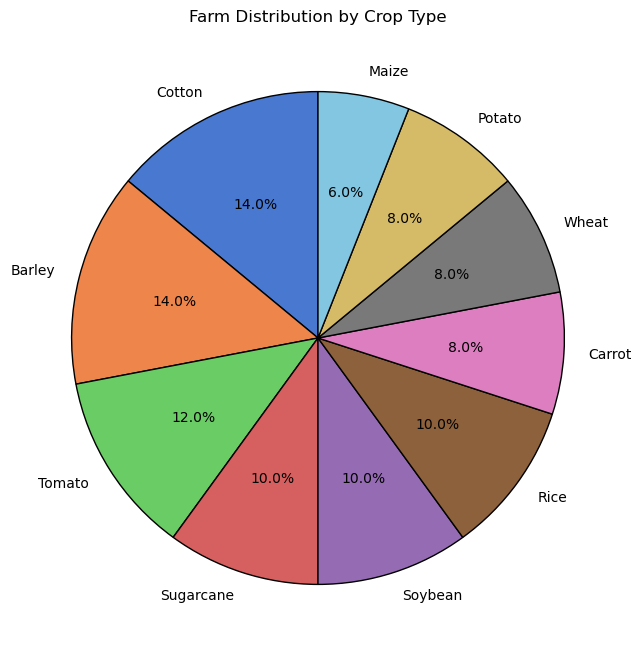

In [17]:
# Plotting the pie chart for farm distribution by crop type
plt.figure(figsize = (8,8))
crop_type_counts = df['Crop_Type'].value_counts()
plt.pie(crop_type_counts, labels=crop_type_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('muted'), wedgeprops={'edgecolor': 'black'})

plt.title('Farm Distribution by Crop Type')
plt.show()

### Insights based on the analysis and visualizations:gion.

#### Crop Type and Farm Association:

Each crop type is associated with a distinct set of farms, and no single farm grows multiple crop types. This setup may imply a specialization in crop cultivation, where each farm is focused on a single crop, possibly to optimize resources and expertise for specific crop needs.

.
Most Common Crops: Certain crops like Barley, Cotton, and Tomato are associated with multiple farms, while others like Maize have fewer farms. This distribution could reflect the popularity or economic value of these crops in the dataset's region.

#### Farm Distribution by Crop Type (Pie Chart):

The pie chart provides a visual distribution of farms across crop types. We can see that the largest segments represent crops with a broader farm base, such as Cotton and Barley. In contrast, smaller segments correspond to crops like Maize and Potato, indicating fewer farms cultivate these crops.


This distribution can help identify crop popularity and farming focus within the dataset, potentially indicating the region’s agricultural strengths or specific crop demands.

#### Specialization of Farms:

Since no farm grows multiple crop types, each farm’s focus on a single crop type could reflect specialized farming practices or crop rotations that don’t overlap within the same season. This setup might also be due to factors like soil suitability, water availability, or climate requirements specific to each crop.

In [18]:
# Calculating the total area for each crop type
total_area_per_crop = df.groupby('Crop_Type')['Farm_Area(acres)'].sum().reset_index()
total_area_per_crop

,Crop_Type,Farm_Area(acres)
0,Barley,1671.22
1,Carrot,765.90
2,Cotton,1993.80
3,Maize,978.53
4,Potato,727.24
5,Rice,1845.24
6,Soybean,1050.68
7,Sugarcane,1187.99
8,Tomato,1655.02
9,Wheat,872.57


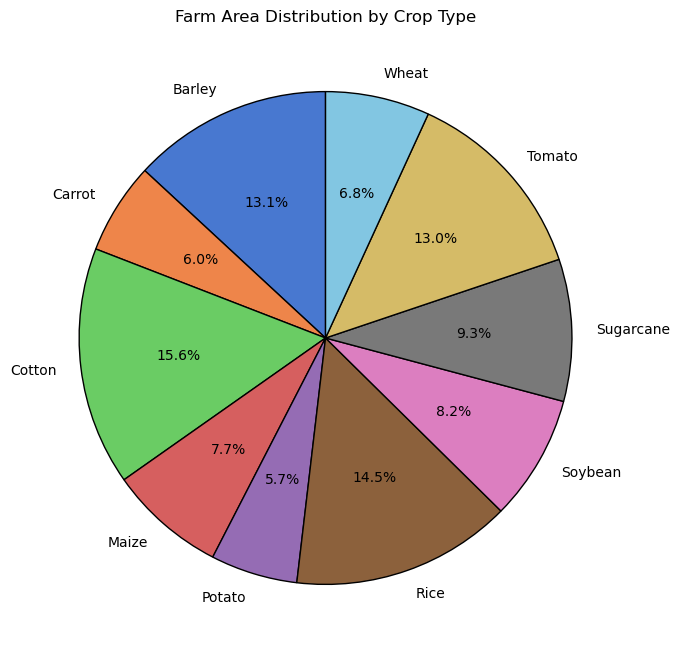

In [19]:
# Plotting a pie chart for the distribution of total Farm_Area(acres) by crop type
plt.figure(figsize=(8, 8))
total_area_per_crop = df.groupby('Crop_Type')['Farm_Area(acres)'].sum()

plt.pie(total_area_per_crop, labels=total_area_per_crop.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('muted'), wedgeprops={'edgecolor': 'black'})

plt.title('Farm Area Distribution by Crop Type')
plt.show()

#### Insights based on the distribution of total farm area by crop typeion.

**Largest Farm Areas:**



**Cotton** (1,993.80 acres), **Rice** (1,845.24 acres), and **Barley** (1,671.22 acres) occupy the largest total farm areas. This suggests that these crops may be highly prioritized or economically significant within the dataset’s region.

**Moderate Farm Areas:**

**Tomato** (1,655.02 acres), **Sugarcane** (1,187.99 acres), and **Soybean** (1,050.68 acres) have substantial but moderate land allocation. These crops still represent a significant part of the agricultural landscape, albeit not as prominent as Cotton and Rice.e.

**Smaller Farm Areas:**
**Carrot** (765.90 acres), **Wheat** (872.57 acres), **Maize** (978.53 acres), and Potato (727.24 acres) have the smallest total areas. These crops may either be less in demand or require less land due to specific cultivation practices.s.

**Overall Observations:**

The distribution of farm area across crop types highlights the emphasis on certain staple crops like Cotton, Rice, and Barley, which are given more land, possibly for economic or agricultural reasons

.
The pie chart visually convey the land allocation, with larger crops clearly standing out, offering a quick visual reference for priority crops in terms of land use.

In [20]:
# Identifying the crop types and the corresponding soil types they grow in
crop_soil_table = df.groupby('Crop_Type')['Soil_Type'].unique().reset_index()
crop_soil_table

,Crop_Type,Soil_Type
0,Barley,"[Sandy, Silty, Clay, Loamy]"
1,Carrot,"[Peaty, Loamy, Clay]"
2,Cotton,"[Loamy, Clay, Sandy]"
3,Maize,"[Peaty, Loamy, Sandy]"
4,Potato,"[Loamy, Sandy, Silty]"
5,Rice,"[Silty, Clay, Sandy]"
6,Soybean,"[Sandy, Silty, Loamy]"
7,Sugarcane,"[Silty, Loamy, Clay, Peaty]"
8,Tomato,"[Silty, Clay, Loamy, Peaty]"
9,Wheat,"[Clay, Loamy, Silty]"


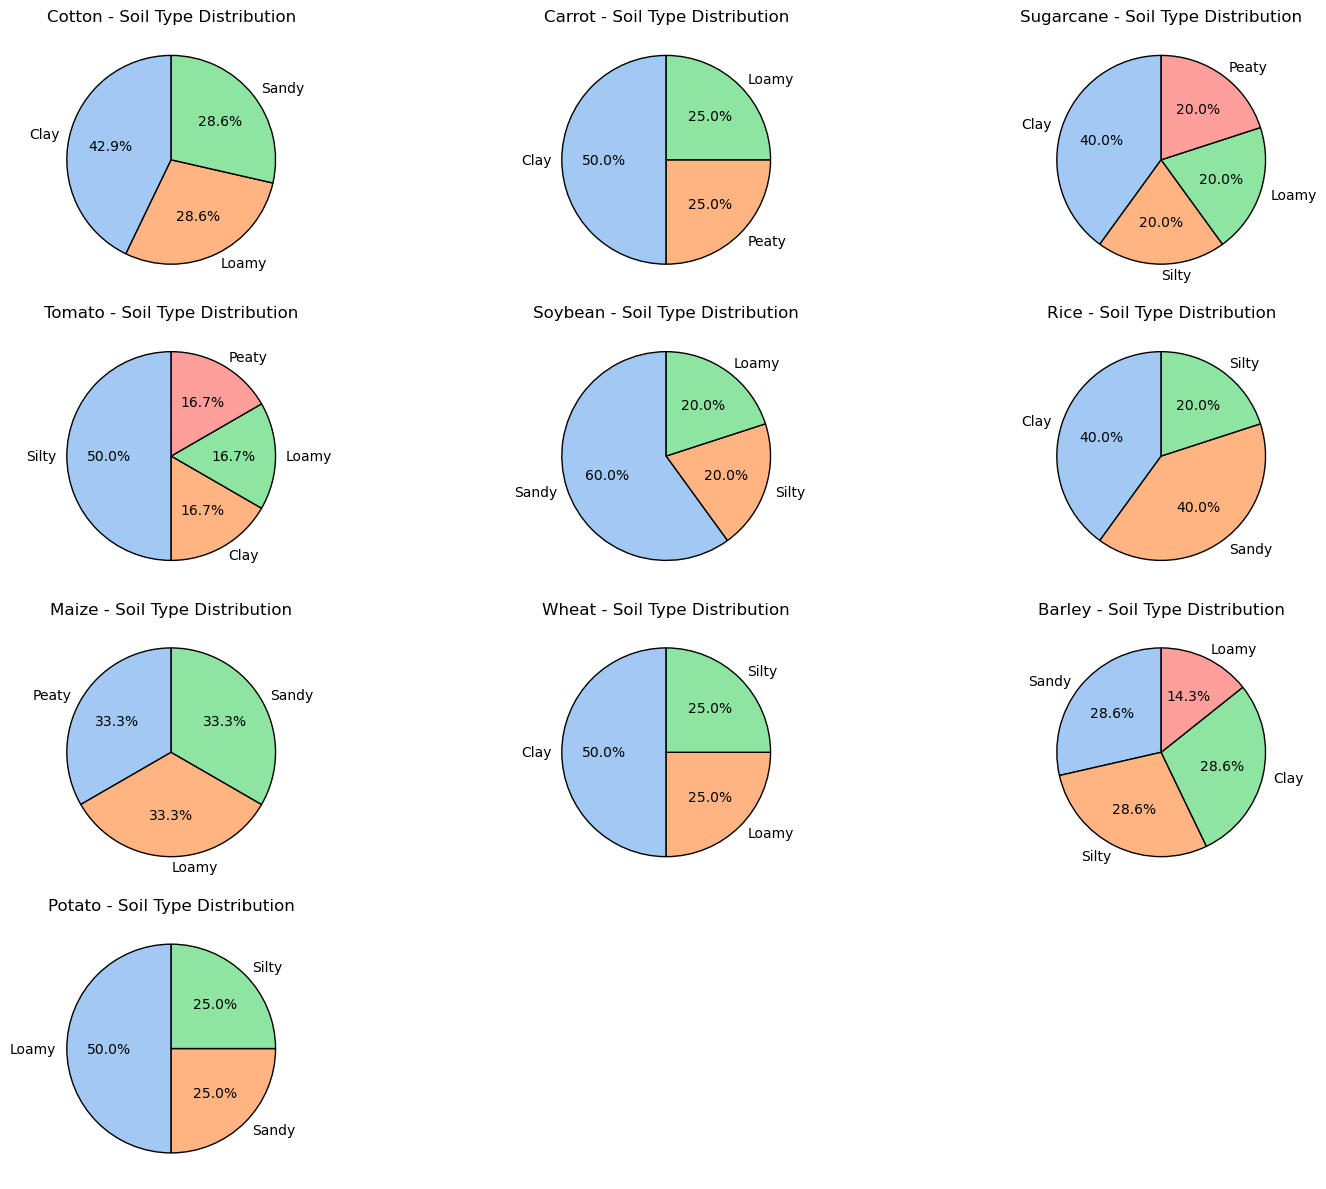

In [21]:
# Plotting pie charts for each crop type to show the distribution of soil types they grow in
unique_crops = df['Crop_Type'].unique()

# Set up a grid for multiple pie charts
plt.figure(figsize=(15, 12))
for i, crop in enumerate(unique_crops, 1):
    plt.subplot(4, 3, i)
    soil_distribution = df[df['Crop_Type'] == crop]['Soil_Type'].value_counts()
    plt.pie(soil_distribution, labels=soil_distribution.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
    plt.title(f'{crop} - Soil Type Distribution')

plt.tight_layout()
plt.show()

#### Insights based on the soil type distribution for each crop type

**Diverse Soil Types:**


Certain crops like **Barley**, **Tomato** and **Sugarcane** are grown in a wide variety of soil types, including Sandy, Silty, Clay, and Loamy. This indicates that these crops are versatile and adaptable to multiple soil conditions.

**Limited Soil Preferences:**


Crops like **carrots** and **Soybean** are associated with fewer soil types. For example, Carrot is primarily found in Peaty, Loamy, and Clay soils, while Soybean predominantly grows in Sandy, Silty, and Loamy soils. This could suggest a more specific soil preference or suitability for these crops.
s.

**Predominant Soil Types:**

**Sandy and Loamy soils** are common across multiple crops, including Cotton, Rice, and Soybean. This prevalence indicates that these soil types are likely more suitable or widely available for various crops in the dataset.t.

**Unique Soil Associations:**


**Peaty soil** is less commonly associated with crops, appearing mainly with Carrot, Sugarcane, Maize, and Tomato. This may indicate that Peaty soil is less prevalent or less suitable for a broad range of crops, except for a few specialized types.s.

**Adaptable Crops:**


**Sugarcane**,**Tomato** and **Barley** grow in a variety of soil types, including Loamy, Silty, Clay, and Peaty soils. This adaptability makes them versatile crops, potentially less affected by soil type variability.y.

In [22]:
# Identifying the crop types and the corresponding seasons they are grown in
crop_season_table = df.groupby('Crop_Type')['Season'].unique().reset_index()

crop_season_table

,Crop_Type,Season
0,Barley,"[Zaid, Kharif]"
1,Carrot,"[Kharif, Zaid, Rabi]"
2,Cotton,"[Kharif, Rabi, Zaid]"
3,Maize,"[Rabi, Zaid]"
4,Potato,"[Zaid, Kharif]"
5,Rice,"[Kharif, Zaid, Rabi]"
6,Soybean,"[Rabi, Kharif, Zaid]"
7,Sugarcane,"[Kharif, Zaid]"
8,Tomato,"[Zaid, Rabi, Kharif]"
9,Wheat,"[Zaid, Rabi]"


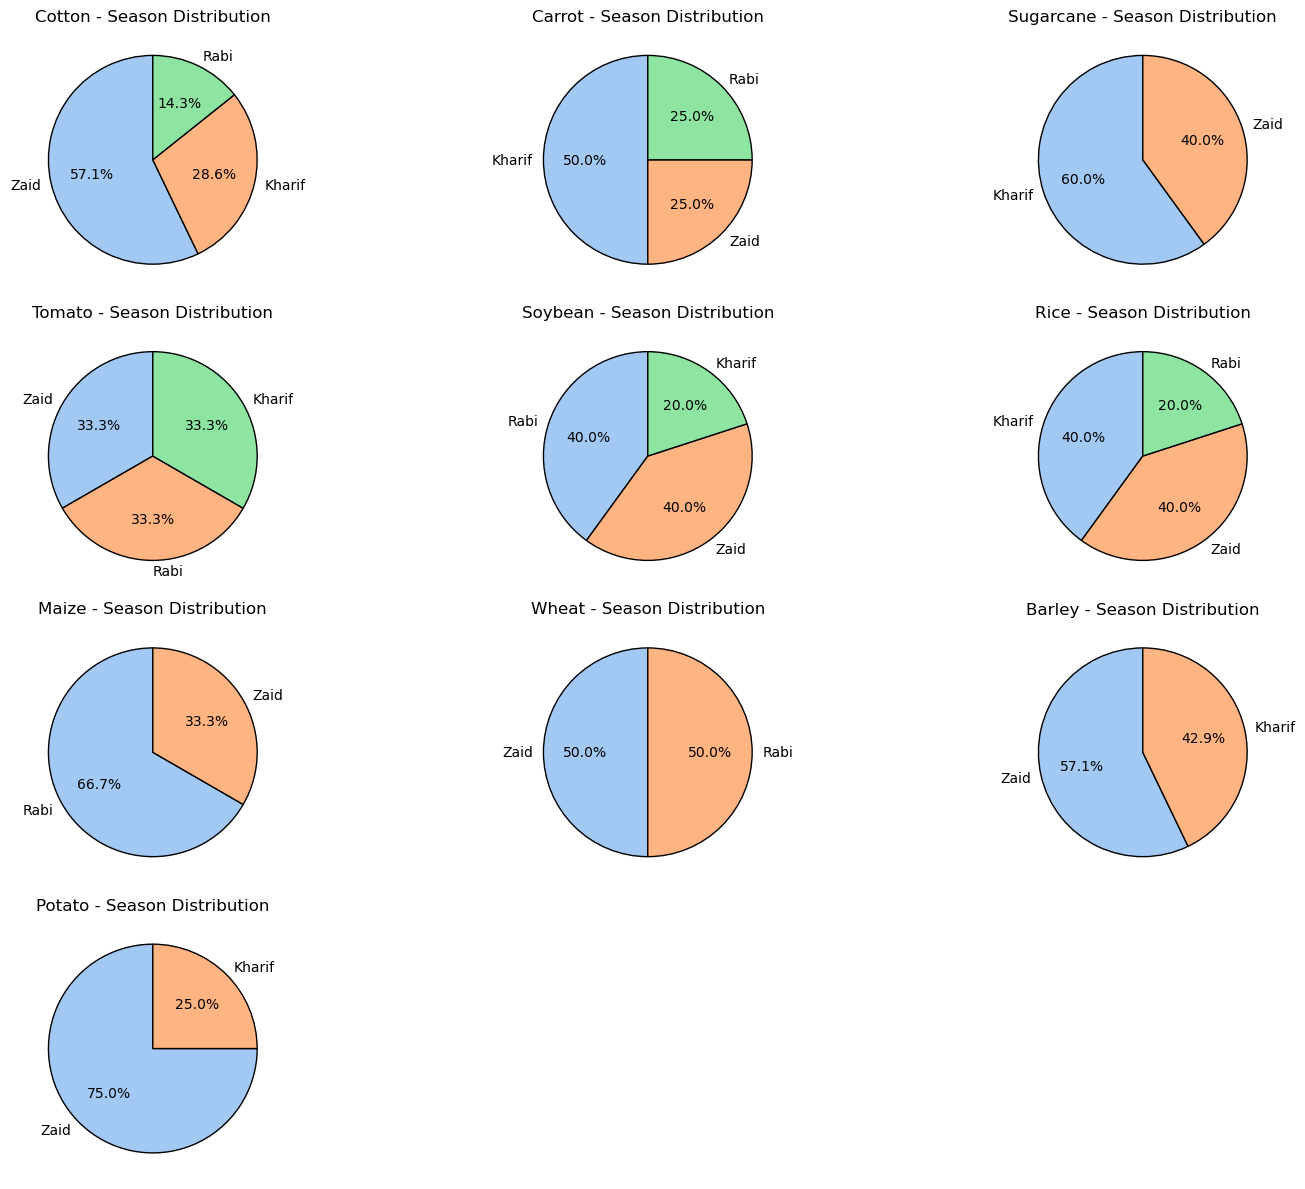

In [23]:
# Plotting pie charts for each crop type to show distribution of seasons they are grown in
plt.figure(figsize=(15, 12))
for i, crop in enumerate(df['Crop_Type'].unique(), 1):
    plt.subplot(4, 3, i)
    season_distribution = df[df['Crop_Type'] == crop]['Season'].value_counts()
    plt.pie(season_distribution, labels=season_distribution.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
    plt.title(f'{crop} - Season Distribution')

plt.tight_layout()
plt.show()

#### Insights based on the season distribution of crop types:



**Multi-Season Crops:**

Crops like **Carrot, Rice, Soybean, and Tomato** are grown across all three seasons (Kharif, Zaid, and Rabi), showcasing their adaptability to different growing conditions and potentially offering continuous yields throughout the year.


**Cotton** also spans all seasons but has a higher concentration in the Kharif season, indicating a strong preference for certain climatic conditions during that period.od.

**Season-Specific Crops:**


**Maize** and **Wheat** are grown in two seasons (Rabi and Zaid) but do not appear in the Kharif season. This suggests a preference for specific climatic or soil conditions during Rabi and Zaid.d.

**Sugarcane** is predominantly grown in the Kharif and Zaid seasons, showing a notable absence from Rabi, which might be due to climatic or crop cycle requirements.

**Dominant Season for Certain Crops:**

**Potato** is primarily grown in the Zaid season (75% of the time) and less in the Kharif season. This suggests a high yield during Zaid, aligning with favorable conditions.s.

**Barley** and **Cotton** are heavily cultivated during the Kharif and Zaid seasons, indicating their importance and adaptability to these seasons' conditions.

**Balanced Crops Across Seasons:**


**Tomato** displays a balanced distribution across Kharif, Zaid, and Rabi seasons, indicating it can be cultivated year-round without significant preference toward any single season.n.

**Wheat** has a balanced 50-50 split between Zaid and Rabi, suggesting stable and predictable yields during these times.

**Overall Observations:**


**Crop Adaptability:** Certain crops like Tomato, Rice, and Carrot are highly versatile, thriving across multiple seasons, whereas others like Maize and Wheat have more focused seasonal windows..

**Seasonal Preferences:** The distribution of crop types per season highlights the significance of specific climatic and growing conditions needed to optimize yields, which can be critical for planning planting cycles and resource allocation.

### Identifying the soil type with the highest crop yield for each crop type

In [24]:
highest_yield_per_crop_soil = df.groupby(['Crop_Type', 'Soil_Type'])['Yield(tons)'].mean().reset_index()
max_yield_per_crop = highest_yield_per_crop_soil.loc[highest_yield_per_crop_soil.groupby('Crop_Type')['Yield(tons)'].idxmax()]

print("Soil Type with Highest Yield for Each Crop Type:")
display(max_yield_per_crop)

# Identifying the soil type with the lowest crop yield for each crop type
min_yield_per_crop = highest_yield_per_crop_soil.loc[highest_yield_per_crop_soil.groupby('Crop_Type')['Yield(tons)'].idxmin()]

print("\nSoil Type with Lowest Yield for Each Crop Type:")
display(min_yield_per_crop)

Soil Type with Highest Yield for Each Crop Type:


,Crop_Type,Soil_Type,Yield(tons)
1,Barley,Loamy,46.470
5,Carrot,Loamy,47.700
9,Cotton,Sandy,28.820
12,Maize,Sandy,39.960
14,Potato,Sandy,31.470
16,Rice,Clay,33.655
19,Soybean,Loamy,40.150
23,Sugarcane,Loamy,38.180
26,Tomato,Clay,43.280
32,Wheat,Silty,36.900



Soil Type with Lowest Yield for Each Crop Type:


,Crop_Type,Soil_Type,Yield(tons)
2,Barley,Sandy,17.440000
4,Carrot,Clay,27.955000
8,Cotton,Loamy,13.485000
11,Maize,Peaty,3.860000
15,Potato,Silty,20.530000
18,Rice,Silty,4.230000
20,Soybean,Sandy,28.983333
22,Sugarcane,Clay,17.185000
27,Tomato,Loamy,12.920000
30,Wheat,Clay,18.070000


#### Summary Insights:

**Loamy soil** is generally associated with higher yields for many crops (Barley, Carrot, Soybean, Sugarcane), highlighting its favorable characteristics for plant growth due to its balance of sand, silt, and clay.

**Sandy soil** supports high yields for crops like Cotton, Maize, and Potato but leads to lower yields for crops like Barley and Soybean, reflecting its mixed suitability depending on crop needs.

**boolClay soil** provides high yields for Rice and Tomato but can negatively impact yields for Carrot, Sugarcane, and Wheat due to its dense structure and water retention characteristics.

Understanding these soil-crop relationships can help optimize crop selection and management practices, enhancing yields based on soil conditions.

### Identifying the soil type with the highest Fertilizer Used for each crop type

In [25]:
highest_fertilizer_per_crop_soil = df.groupby(['Crop_Type', 'Soil_Type'])['Fertilizer_Used(tons)'].mean().reset_index()
max_fertilizer_per_crop = highest_fertilizer_per_crop_soil.loc[highest_fertilizer_per_crop_soil.groupby('Crop_Type')['Fertilizer_Used(tons)'].idxmax()]

print("Soil Type with Highest Fertilizer Used for Each Crop Type:")
display(max_fertilizer_per_crop)

# Identifying the soil type with the lowest Fertilizer Used for each crop type
min_fertilizer_per_crop = highest_fertilizer_per_crop_soil.loc[highest_fertilizer_per_crop_soil.groupby('Crop_Type')['Fertilizer_Used(tons)'].idxmin()]

print("\nSoil Type with Lowest Fertilizer Used for Each Crop Type:")
display(min_fertilizer_per_crop)

Soil Type with Highest Fertilizer Used for Each Crop Type:


,Crop_Type,Soil_Type,Fertilizer_Used(tons)
1,Barley,Loamy,7.790
5,Carrot,Loamy,5.890
8,Cotton,Loamy,6.245
10,Maize,Loamy,4.910
13,Potato,Loamy,9.430
16,Rice,Clay,7.165
21,Soybean,Silty,8.570
23,Sugarcane,Loamy,6.420
26,Tomato,Clay,8.330
30,Wheat,Clay,6.105



Soil Type with Lowest Fertilizer Used for Each Crop Type:


,Crop_Type,Soil_Type,Fertilizer_Used(tons)
2,Barley,Sandy,2.900
6,Carrot,Peaty,4.770
9,Cotton,Sandy,2.100
11,Maize,Peaty,0.570
14,Potato,Sandy,3.860
17,Rice,Sandy,4.595
19,Soybean,Loamy,1.180
22,Sugarcane,Clay,1.895
27,Tomato,Loamy,4.750
32,Wheat,Silty,1.790


#### Summary Observations:

**Loamy Soil:** While it often requires high fertilizer input due to its balanced texture and nutrient-holding capacity, it also supports high yields, making the investment in fertilizers worthwhile for many crops.

**Sandy Soil:** Consistently appears with the lowest fertilizer usage, possibly due to its poor retention capabilities, leading to limited absorption and requiring different nutrient management practices.

**Soil-Crop Specificity:** Fertilizer usage varies significantly depending on the crop-soil combination, reflecting complex interactions between soil properties, nutrient needs, and crop characteristics.

These insights can help in optimizing fertilizer management practices to reduce costs and improve yields by targeting specific soil and crop combinations.

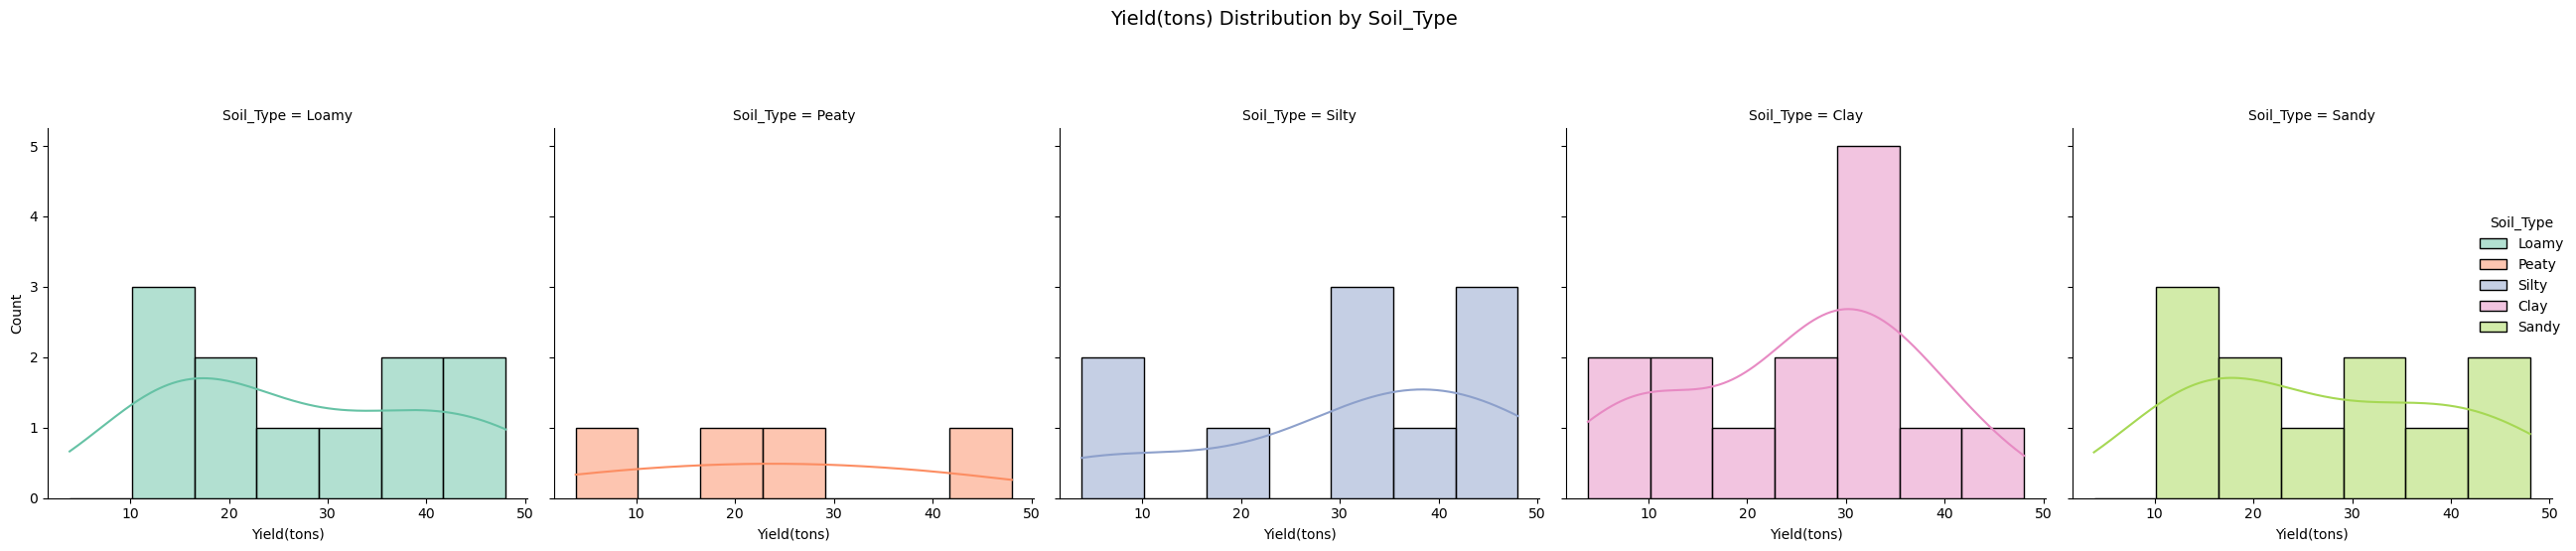

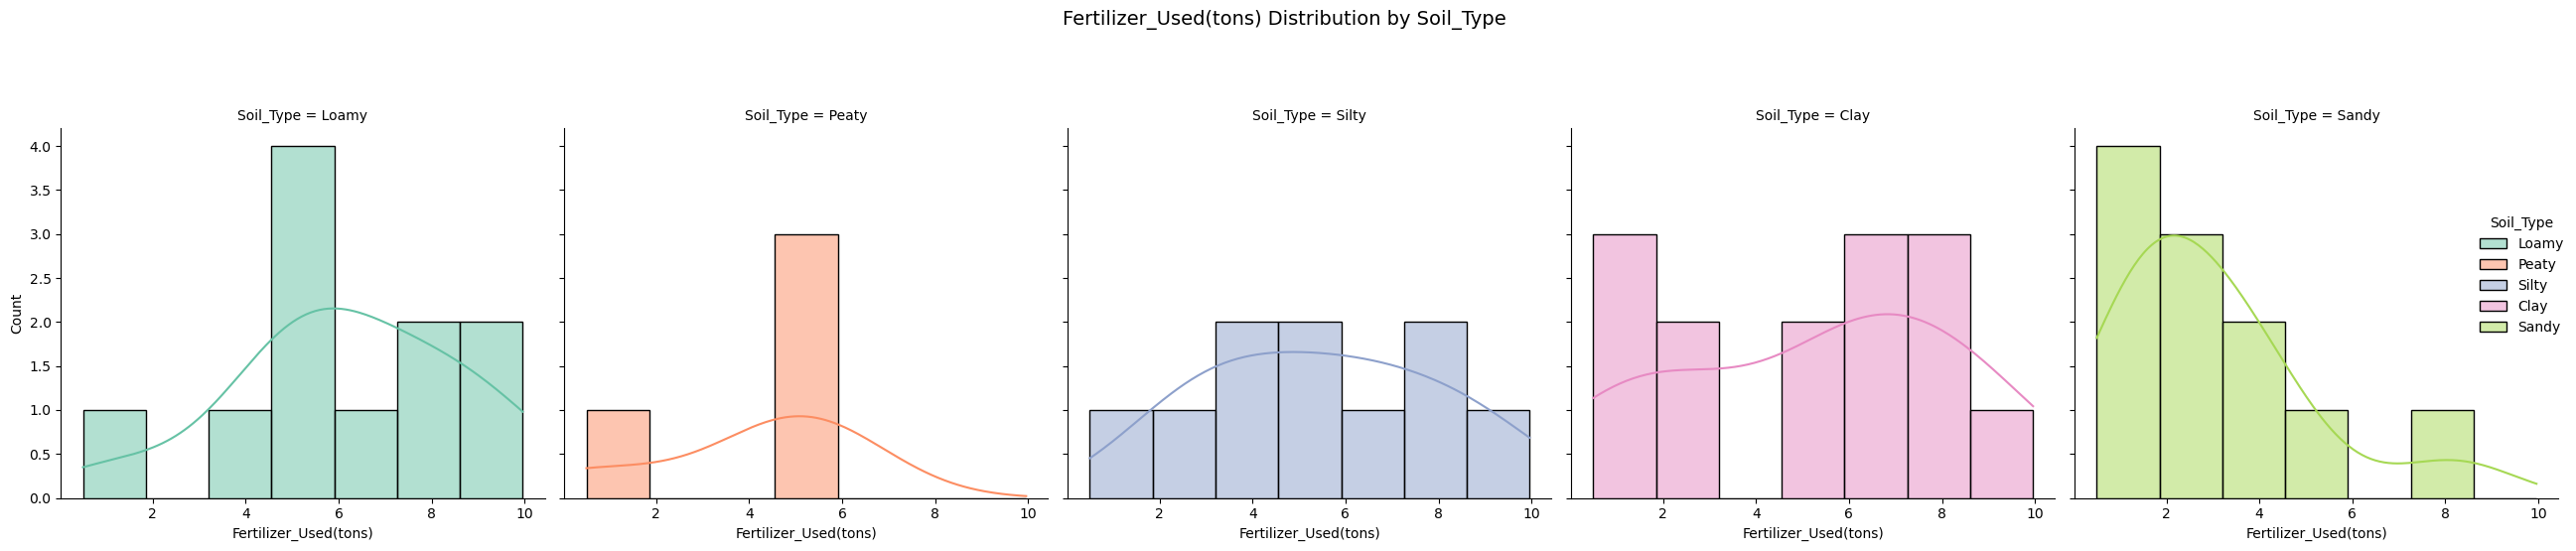

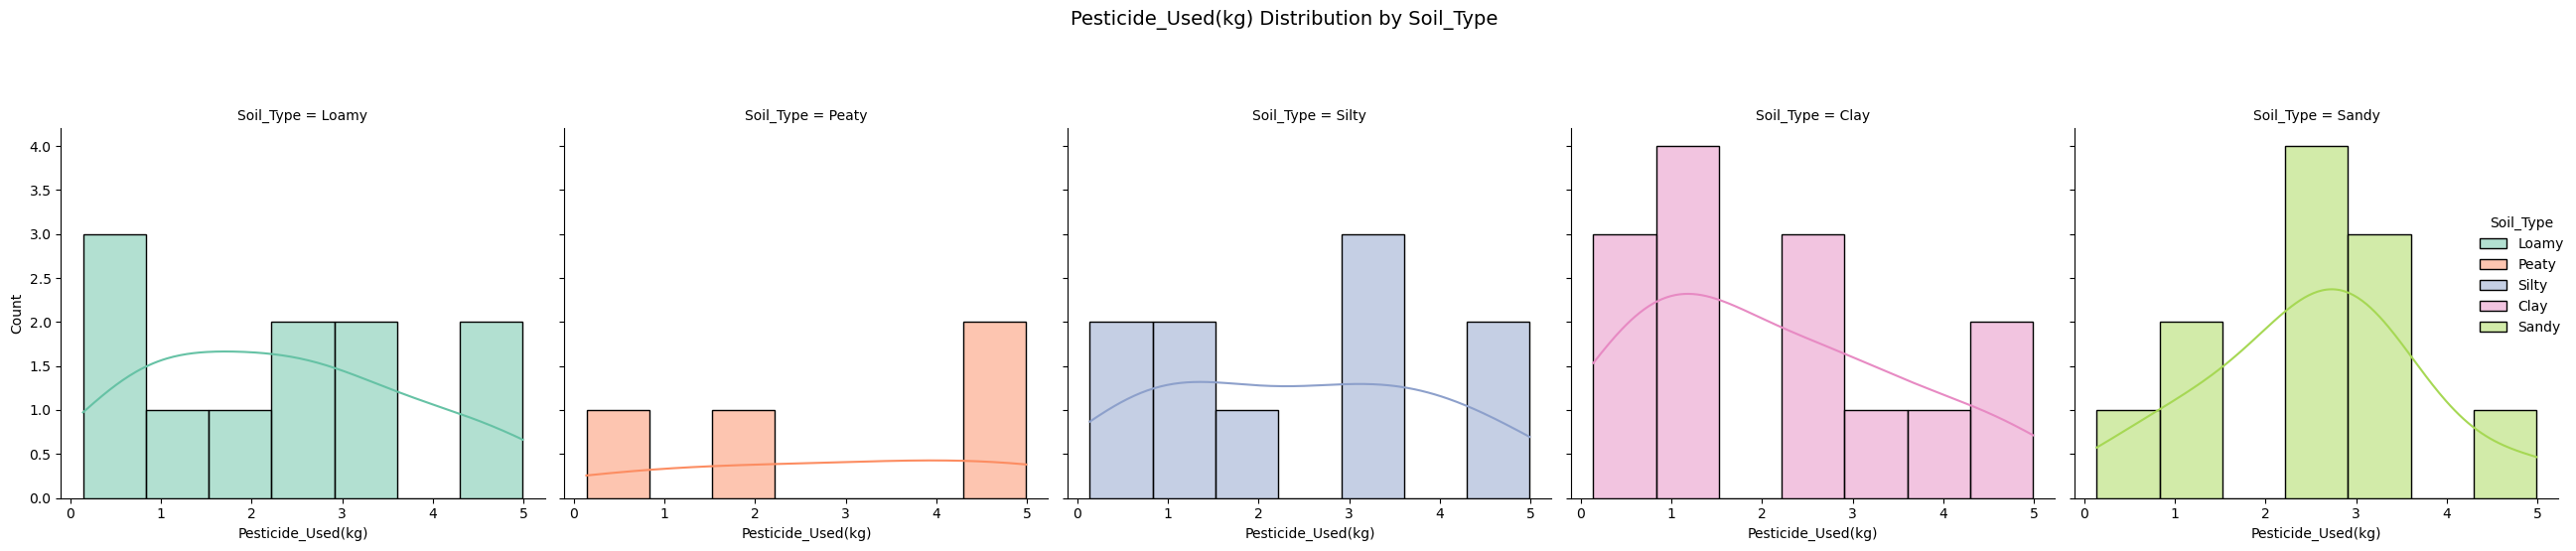

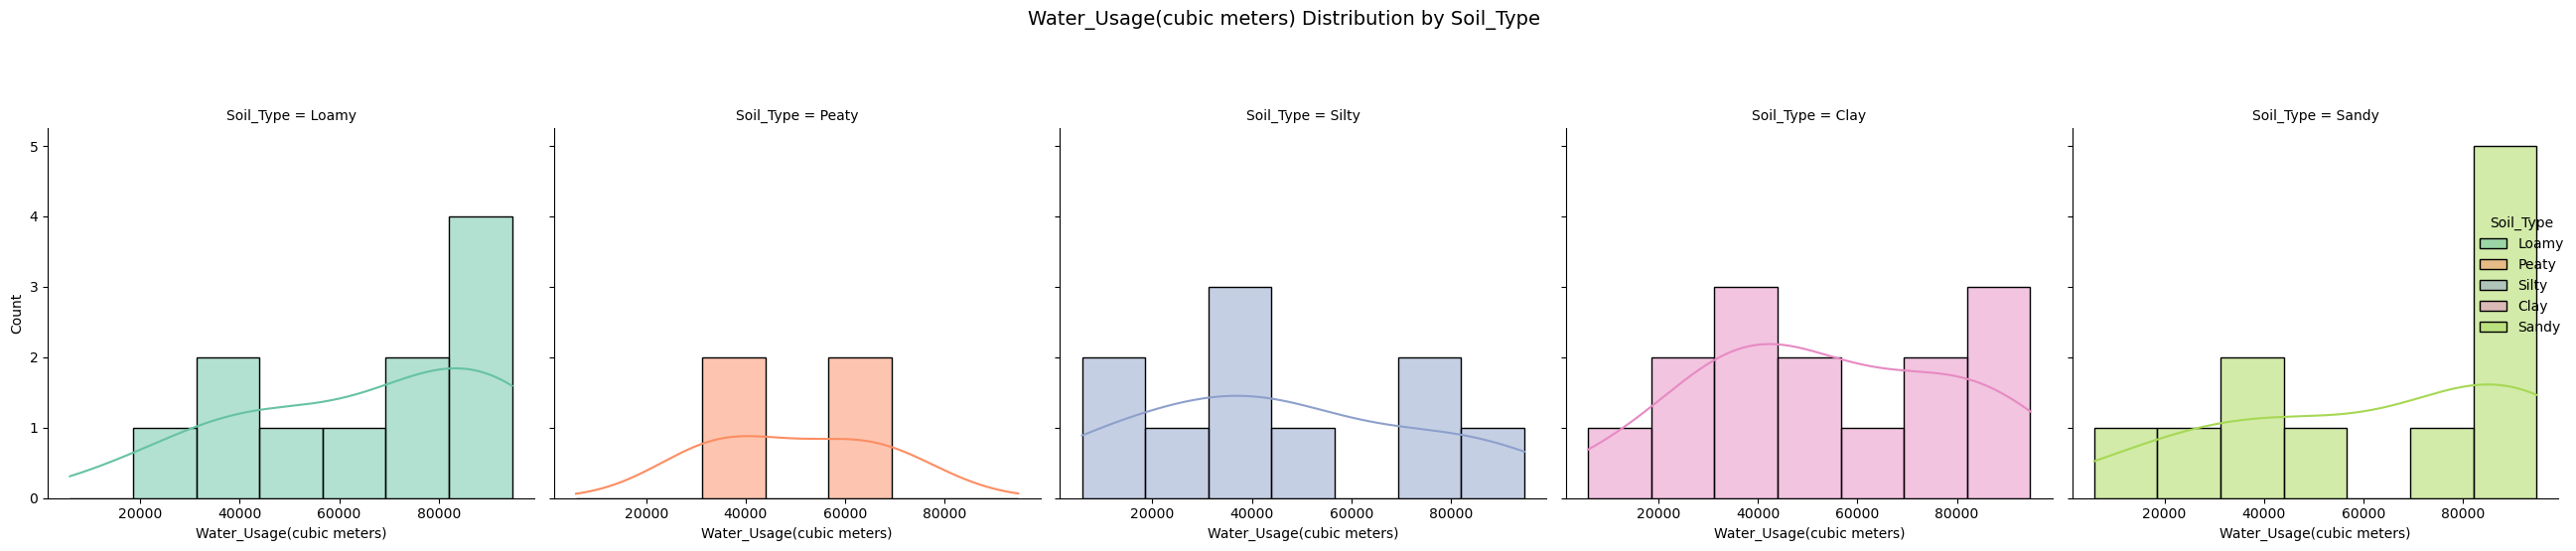

In [26]:
def create_displots(data, columns, col, hue, palette='Set2'):
    for column in columns:
        g = sns.displot(data=data, x=column, col=col, hue=hue, kde=True, palette=palette)
        g.fig.suptitle(f'{column} Distribution by {col}', fontsize=14, y=1.10)
        plt.tight_layout()
        plt.show()

# List of columns to create distribution plots for
columns_to_plot = ["Yield(tons)", "Fertilizer_Used(tons)", "Pesticide_Used(kg)", "Water_Usage(cubic meters)"]
create_displots(df, columns_to_plot, col='Soil_Type', hue='Soil_Type')

#### Summary Observations:

**Loamy Soil:** Generally supports higher productivity and shows a broad range of input (fertilizer, pesticide, water) usage, indicating intensive management practices for maximizing yields.

**Sandy Soil:** Requires more careful management of inputs, particularly water, due to quick drainage, and shows moderate pesticide and fertilizer usage.

**Clay Soil:** Offers moderate-to-high productivity with balanced input usage, reflecting its water and nutrient retention properties.

**Peaty Soil:** Shows lower input usage and yields, highlighting its natural fertility but potential limitations in terms of productivity.

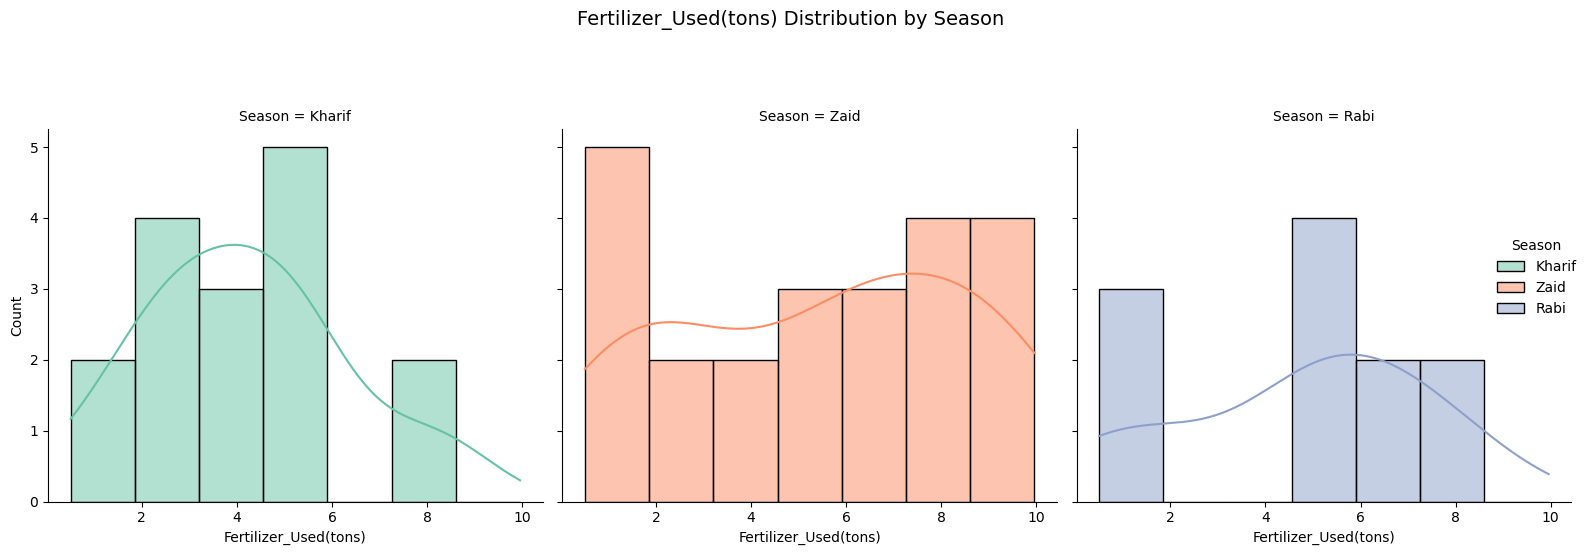

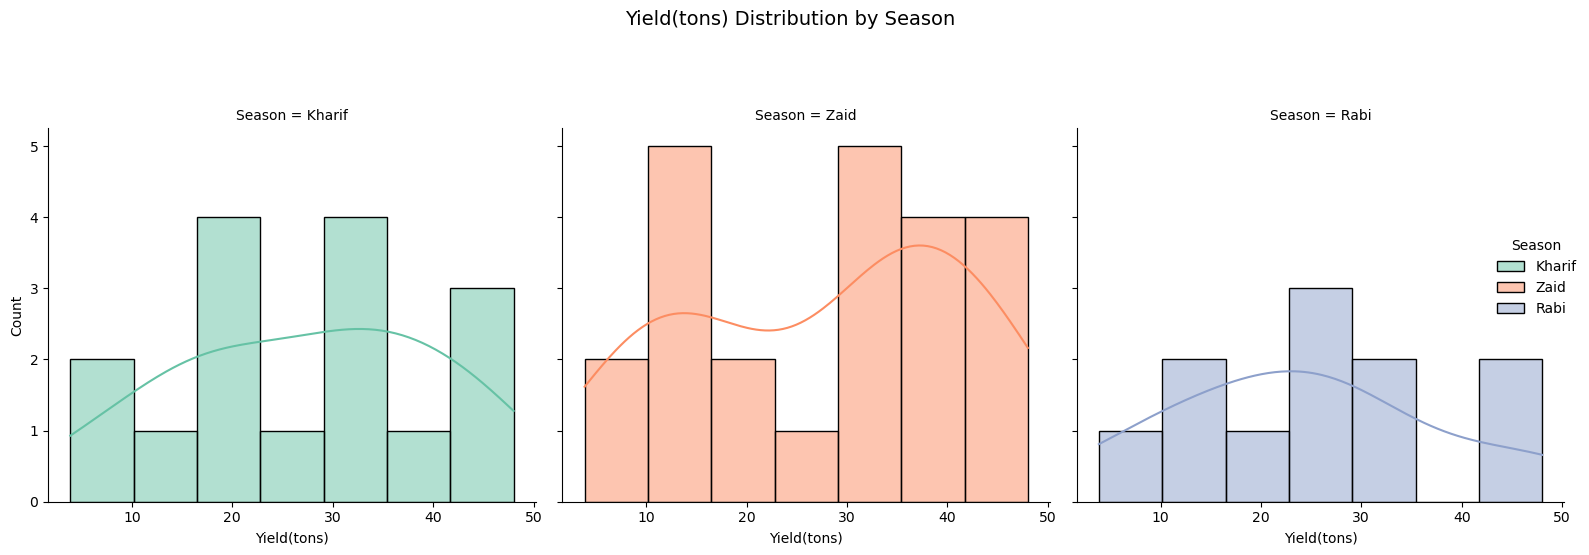

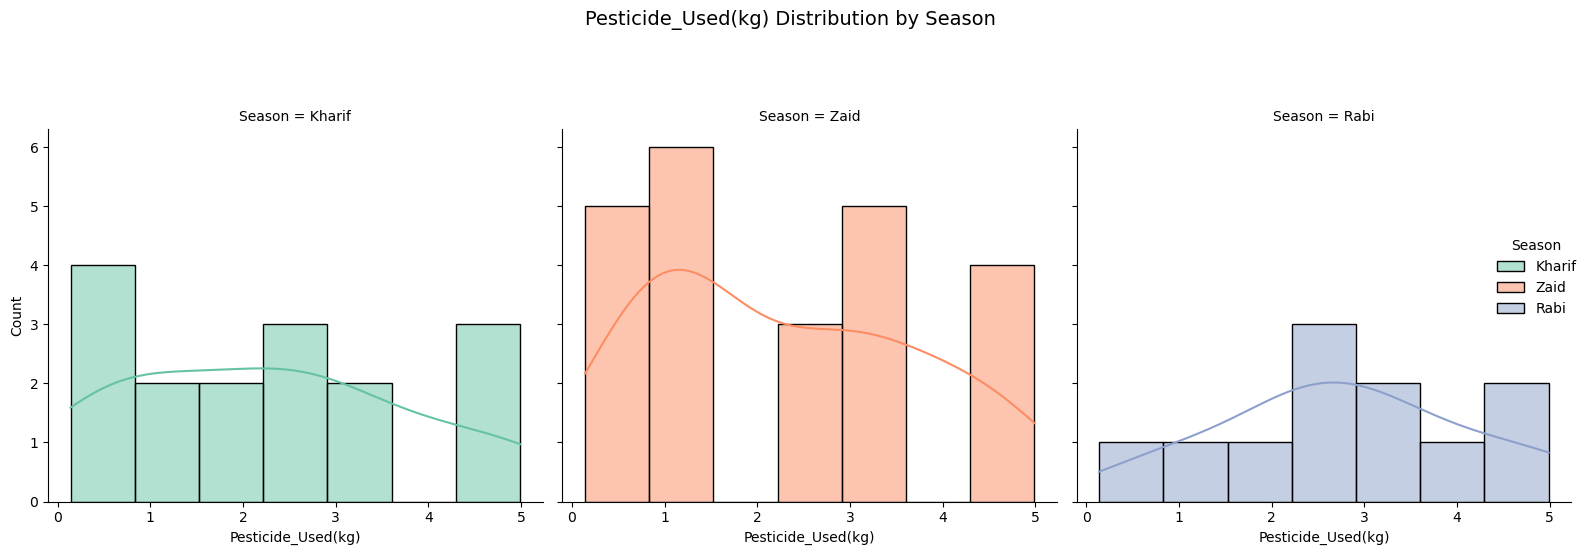

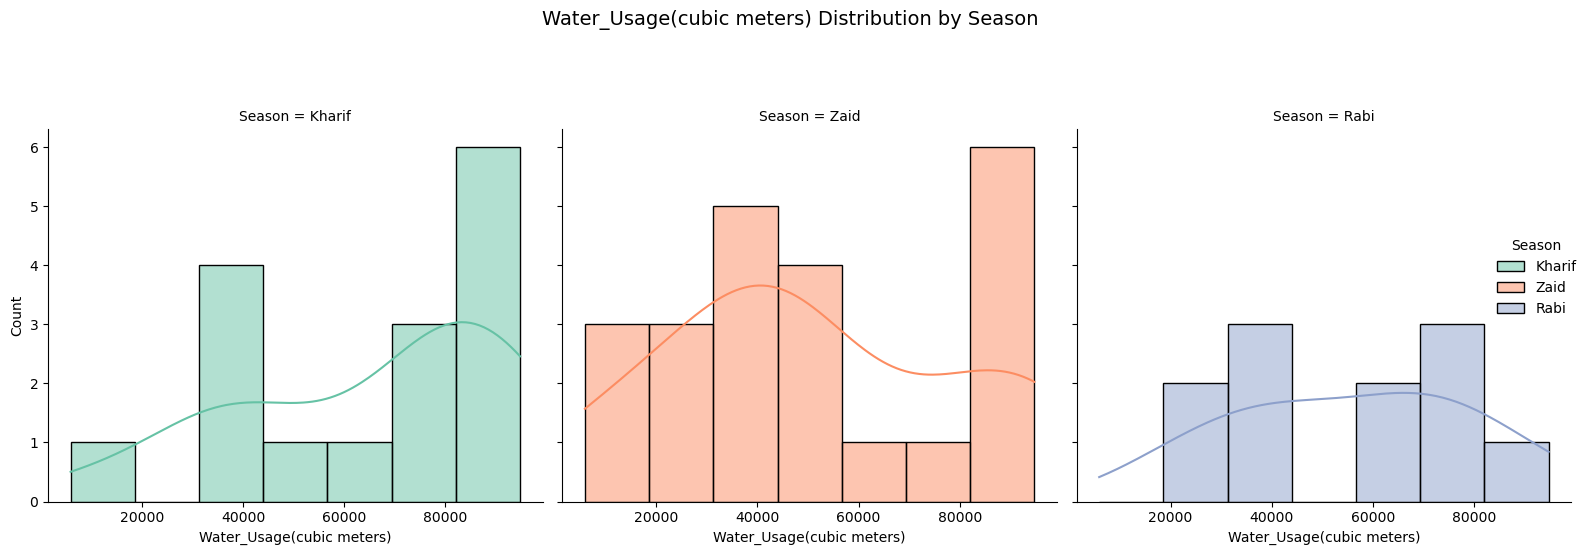

In [27]:
def create_displots_by_season(data, columns, col, hue, palette='Set2'):
    for column in columns:
        g = sns.displot(data=data, x=column, col=col, hue=hue, kde=True, palette=palette)
        g.fig.suptitle(f'{column} Distribution by {col}', fontsize=14, y=1.10)
        plt.tight_layout()
        plt.show()

# List of columns to create distribution plots for
columns_to_plot = ["Fertilizer_Used(tons)", "Yield(tons)", "Pesticide_Used(kg)", "Water_Usage(cubic meters)"]
create_displots_by_season(df, columns_to_plot, col='Season', hue='Season')

#### Summary Observations:

**Kharif Season** generally sees higher inputs (fertilizer, water, and pesticides) and yields due to favorable growing conditions but comes with increased pest and disease risks.

**Rabi Season** demonstrates a more balanced but moderate level of inputs and yields, reflecting stable but lower productivity relative to Kharif.

**Zaid Season** shows lower inputs and yields, indicating a focus on less water-intensive, short-duration crops with reduced pest pressure.

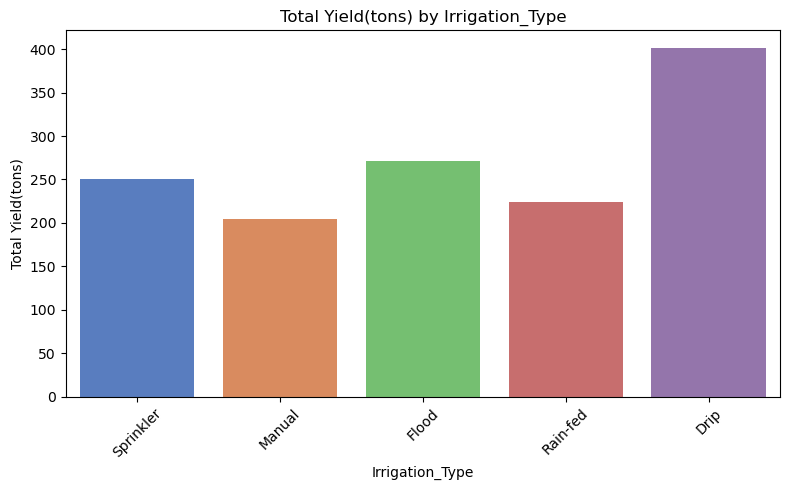

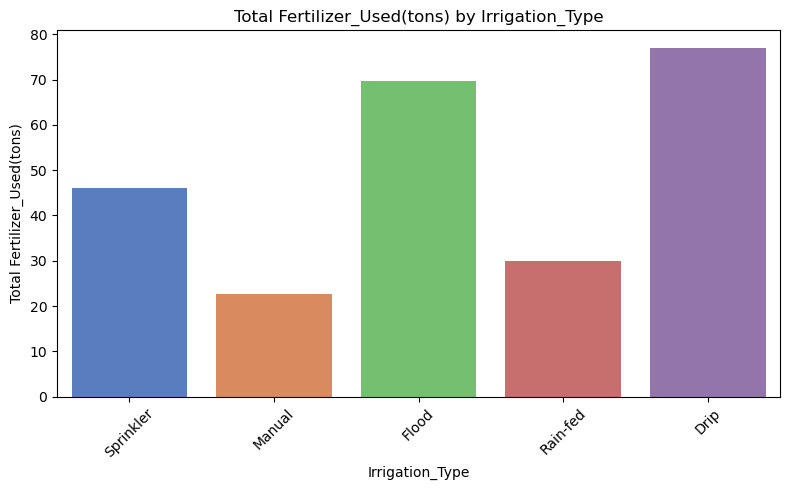

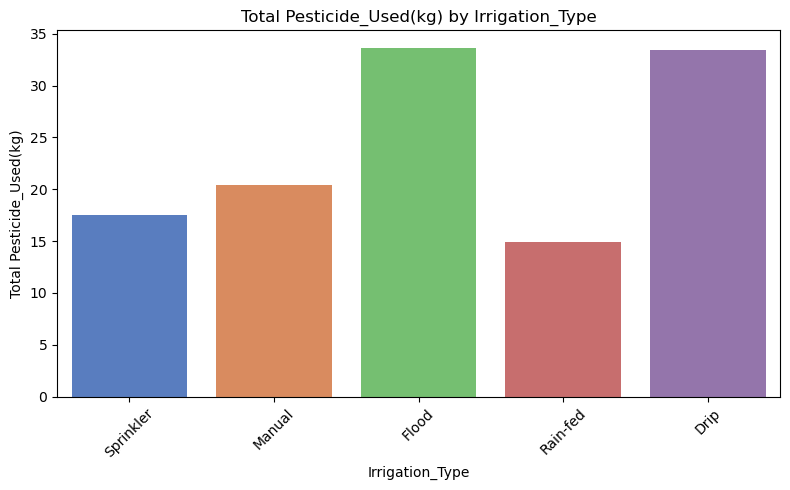

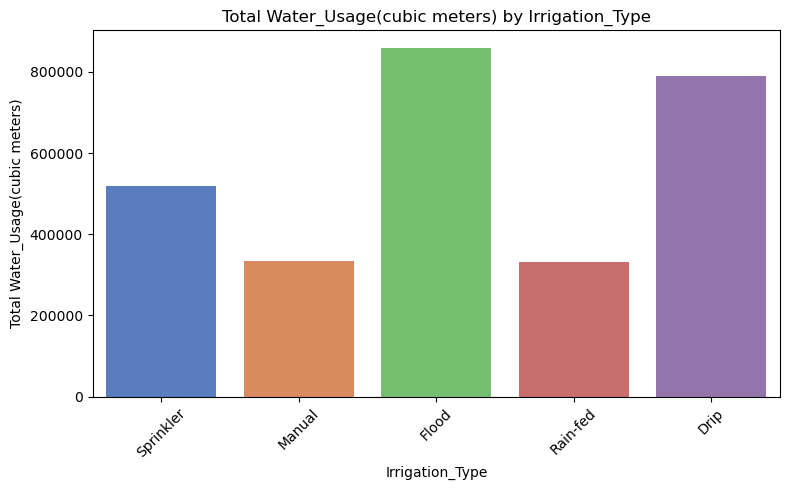

In [28]:
def create_bar_plots(data, x_column, y_columns, estimator=sum, ci=None, palette='muted'):
    for y_column in y_columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(data=data, x=x_column, y=y_column, ci=ci, estimator=estimator, palette=palette)
        plt.title(f'Total {y_column} by {x_column}')
        plt.xlabel(x_column)
        plt.ylabel(f'Total {y_column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# List of y_columns to create bar plots for
y_columns = ['Yield(tons)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Water_Usage(cubic meters)']
create_bar_plots(df, 'Irrigation_Type', y_columns)

#### Overall Observations:

**Efficiency of Drip Irrigation:** Drip irrigation consistently shows strong performance in terms of yield while managing moderate levels of fertilizer and water use, highlighting its efficiency and potential for sustainable agriculture.

**High Input Demands of Flood Irrigation:** While flood irrigation achieves high yields, it comes at the cost of high water and fertilizer usage, indicating potential inefficiencies and environmental impacts.

**Lower Inputs for Rain-fed and Manual Irrigation:** These irrigation methods generally show lower values for all metrics, reflecting less intensive and more traditional agricultural practices, but they often result in lower yields.

### bar plots to visualize Crop Yield by Season for each Crop Type

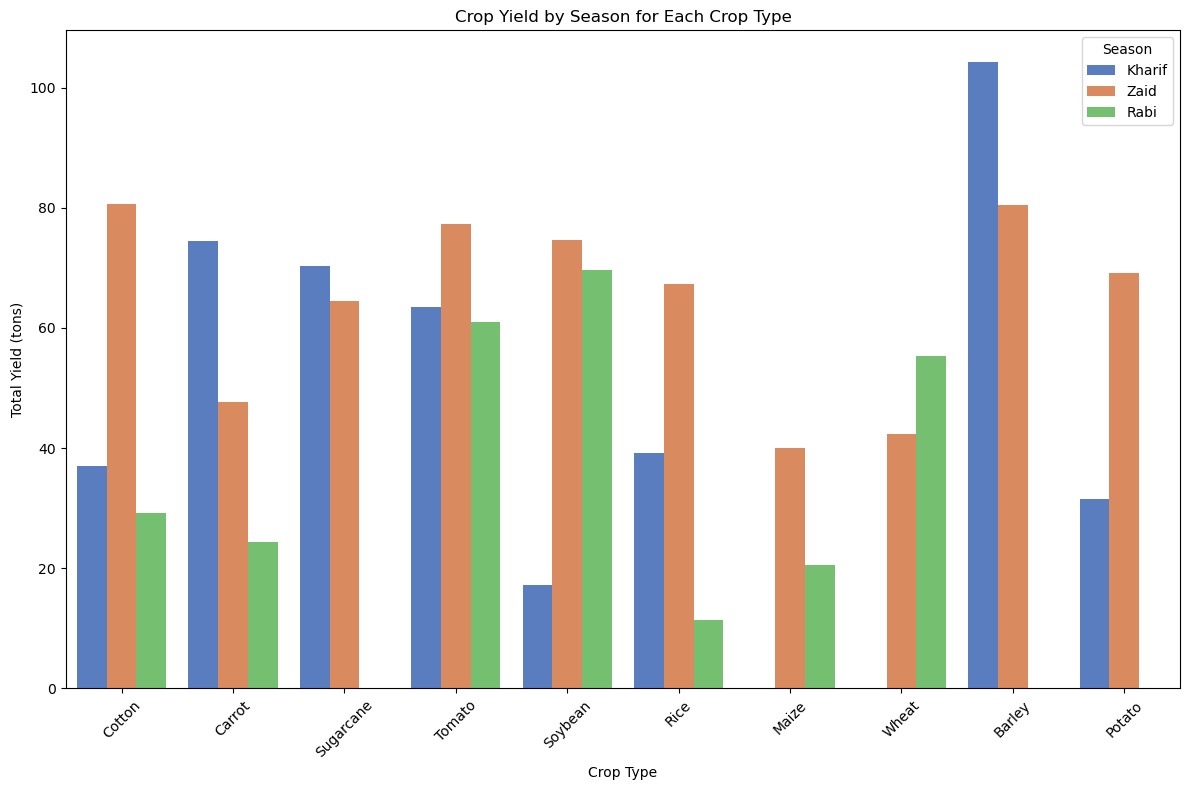

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Crop_Type', y='Yield(tons)', hue='Season', estimator=sum, ci=None, palette='muted')
plt.title('Crop Yield by Season for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Total Yield (tons)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

### bar plot to visualize total Fertilizer_Used(tons) by season for each crop type

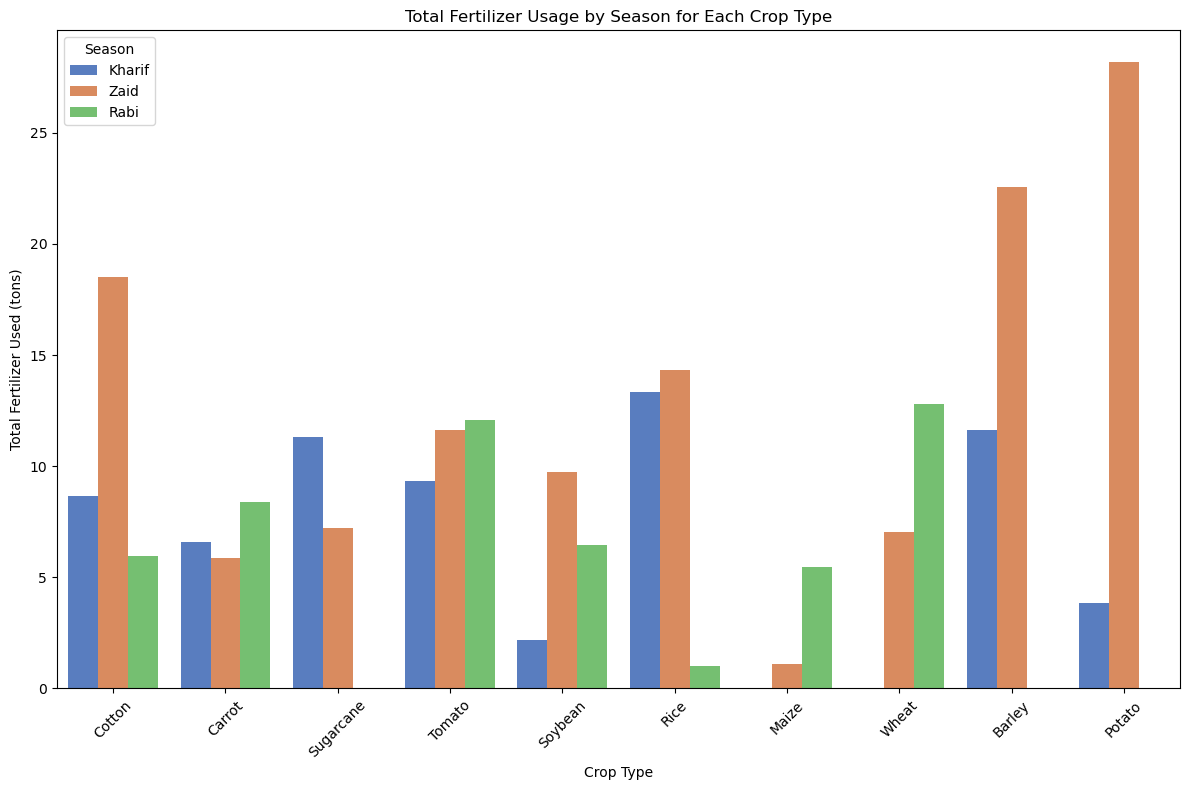

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Crop_Type', y='Fertilizer_Used(tons)', hue='Season', estimator=sum, ci=None, palette='muted')
plt.title('Total Fertilizer Usage by Season for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Total Fertilizer Used (tons)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

### plot to visualize total pesticide usage by season for each crop type

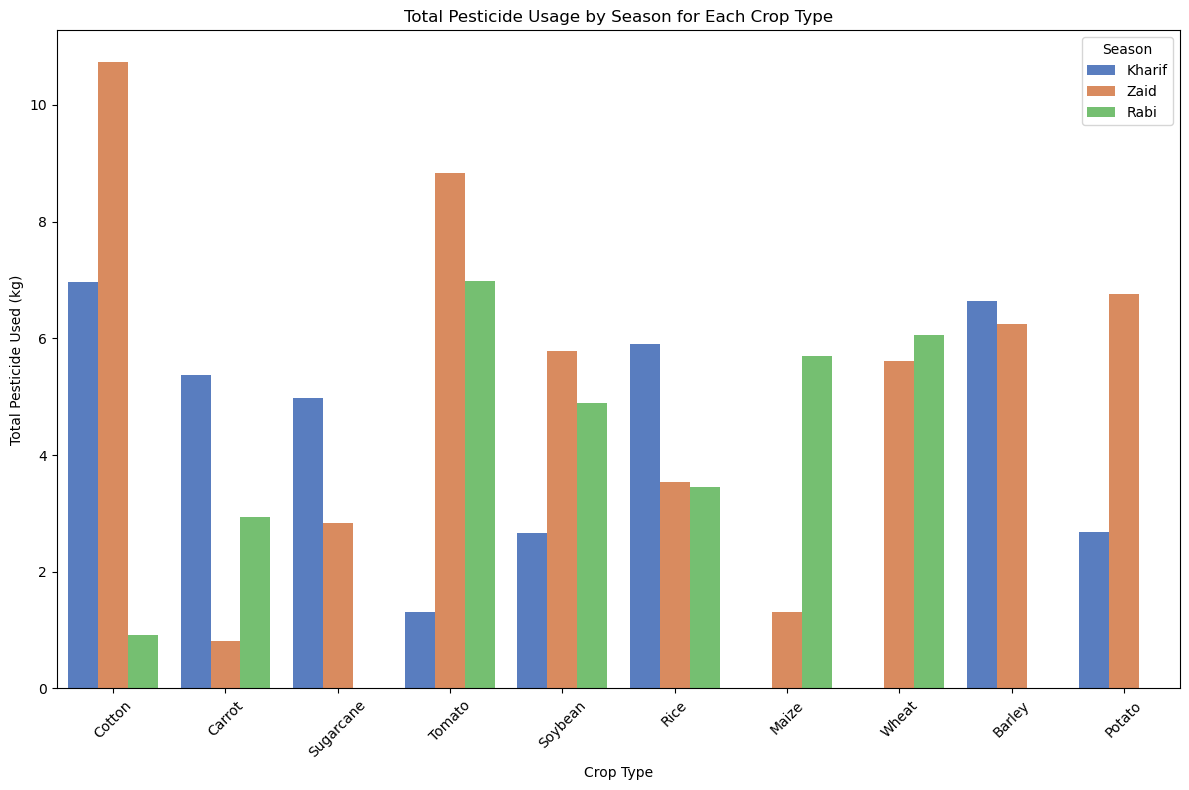

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Crop_Type', y='Pesticide_Used(kg)', hue='Season', estimator=sum, ci=None, palette='muted')

plt.title('Total Pesticide Usage by Season for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Total Pesticide Used (kg)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

### Model Training and Evaluation

In [44]:
# Dictionary to store models and results
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse'),
    'LGBM': LGBMRegressor(verbose=-1, random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)
}

results = {}

# Training and evaluating each model
for model_name, model in models.items():
    # Training
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}
    
    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")

Linear Regression - MSE: 213.73, R2: -0.34
Random Forest - MSE: 131.51, R2: 0.18
XGBoost - MSE: 192.98, R2: -0.21
LGBM - MSE: 142.73, R2: 0.11
CatBoost - MSE: 124.94, R2: 0.22


In [45]:
best_model = min(results, key=lambda x: results[x]['MSE'])
print(f"The best model is: {best_model} with MSE: {results[best_model]['MSE']:.2f} and R2: {results[best_model]['R2']:.2f}")

The best model is: CatBoost with MSE: 124.94 and R2: 0.22


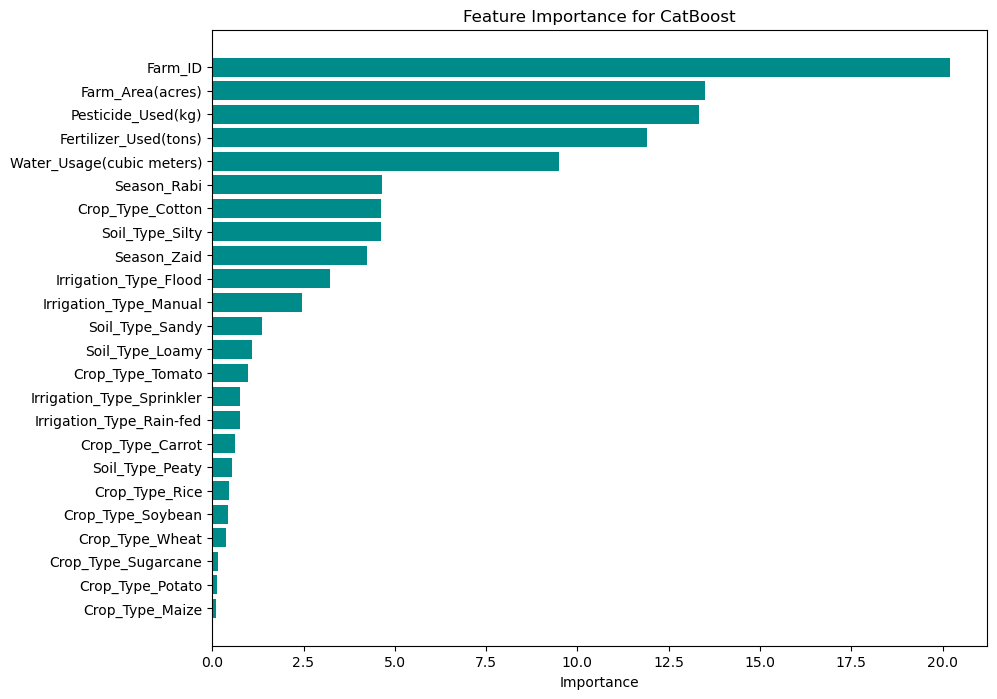

In [46]:
# Assuming best_model is defined and models is a dictionary containing model instances
if best_model in ['Random Forest', 'XGBoost', 'LGBM', 'CatBoost']:
    best_model_instance = models[best_model]
    feature_importances = best_model_instance.feature_importances_
    sorted_idx = np.argsort(feature_importances)
    feature_names = X.columns
    
    plt.figure(figsize=(10, 8))
    
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color='darkcyan')
    
    plt.yticks(np.arange(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.title(f'Feature Importance for {best_model}')
    plt.xlabel('Importance')
    plt.show()